<h1 style="color: red;">Lead Scoring Case Study Assignment</h1>


#### Submitted by 
- Prashant Dhar Dwivedi
- Rakshith Shetty

## Problem Statement

- Develop a lead scoring model that takes into account various factors to predict the conversion probability for each lead.
- Assign lead scores to each lead based on the model's predictions.
- Identify the leads with the highest scores as the 'Hot Leads' with the greatest potential for conversion.

By implementing this predictive model, X Education aims to optimize their lead conversion process, focus their sales efforts on the most promising leads, and ultimately achieve the target conversion rate of 80%.

## Steps to be Followed
----------------------------------------------------------------------------------------------------------------------------------------------------

- Dataset Reading
- Data Understanding using info, describe, null value counts, unique value counts, value distribution of each column.
- Exploratory data analysis - this includes Univariate analysis and bivariate analysis.
- Data Preparation - Creating dummy variables
- Splitting the data in Test and Train.
- Feature Scaling
- Feature Selection using RFE
- Model Building
- Confusion Matrix
- AUR-ROC Curve
- Precision Recall
- Predication on Test Set



In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset file

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking the null count values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Calculate the percentage of null values in each column

null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#Checking for the column having null values more than 35%
null_percentage= lead_df.isnull().mean()*100
null_percentage[null_percentage>35]

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [9]:
# Loop through each column and print unique values
for column in lead_df.columns:
    unique_values = lead_df[column].unique()
    print(f"{column}: {unique_values}")

Prospect ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Number: [660737 660728 660727 ... 579545 579538 579533]
Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email: ['No' 'Yes']
Do Not Call: ['No' 'Yes']
Converted: [0 1]
TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251

In [10]:
for column in lead_df.columns:
    unique_count = lead_df[column].nunique()
    print(f"{column}: {unique_count}")

Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 21
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 41
Total Time Spent on Website: 1731
Page Views Per Visit: 114
Last Activity: 17
Country: 38
Specialization: 19
How did you hear about X Education: 10
What is your current occupation: 6
What matters most to you in choosing a course: 3
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 26
Lead Quality: 5
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 6
City: 7
Asymmetrique Activity Index: 3
Asymmetrique Profile Index: 3
Asymmetrique Activity Score: 12
Asymmetrique Profile Score: 10
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [11]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EDA

In [12]:
# Taking the list of the columns having null values more than 35%
null_values_list = null_percentage[null_percentage>35].index.tolist()

In [13]:
# Dropping the column having null values more than 35%, since imputation of values can majorly effect the results of EDA

lead_df.drop(null_values_list, axis = 1, inplace = True)

In [14]:
lead_df.shape

(9240, 31)

In [15]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

In [18]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
search_columns = lead_df.columns[16:22]
search_columns

Index(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement'],
      dtype='object')

In [20]:
# Dropping Search columns and related fields as it has an extreme dataimbalance.
lead_df.drop(search_columns, axis = 1, inplace = True)

In [21]:
lead_df.shape

(9240, 25)

In [22]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

##### Below are the columns which either has data imbalance or the field is does not relevent with respect to analysis, therefore dropping these columns
- Do not Email
- Prospect ID
- Lead Number
- What matters most to you in choosing a course
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [23]:
drop_columns = ['Do Not Call','Do Not Email','Prospect ID','Lead Number','What matters most to you in choosing a course','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [24]:
# Dropping drop columns 
lead_df.drop(drop_columns, axis = 1, inplace = True)

In [25]:
lead_df.shape

(9240, 15)

In [26]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
0    0.61461
1    0.38539
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0

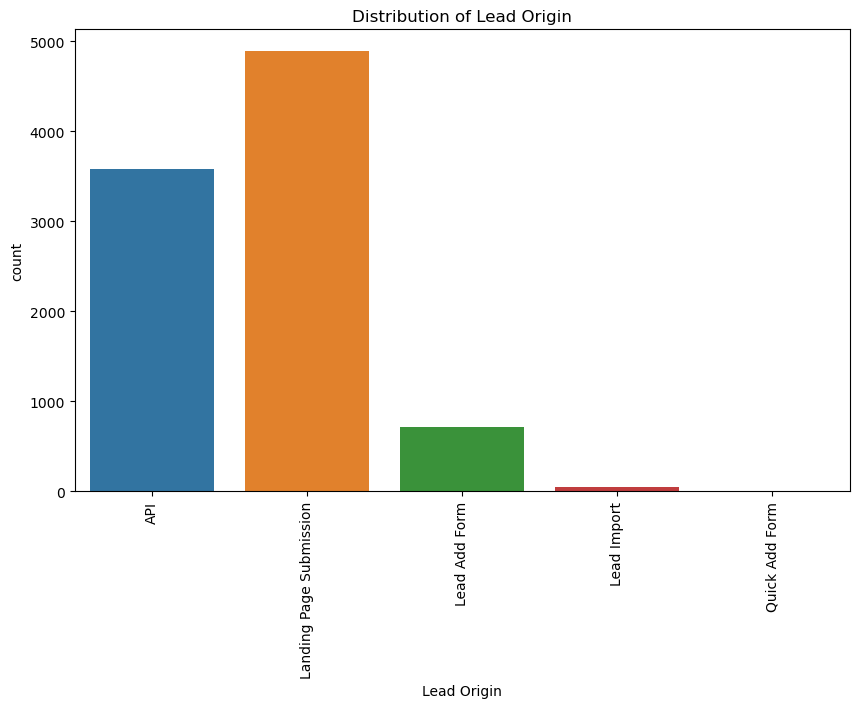

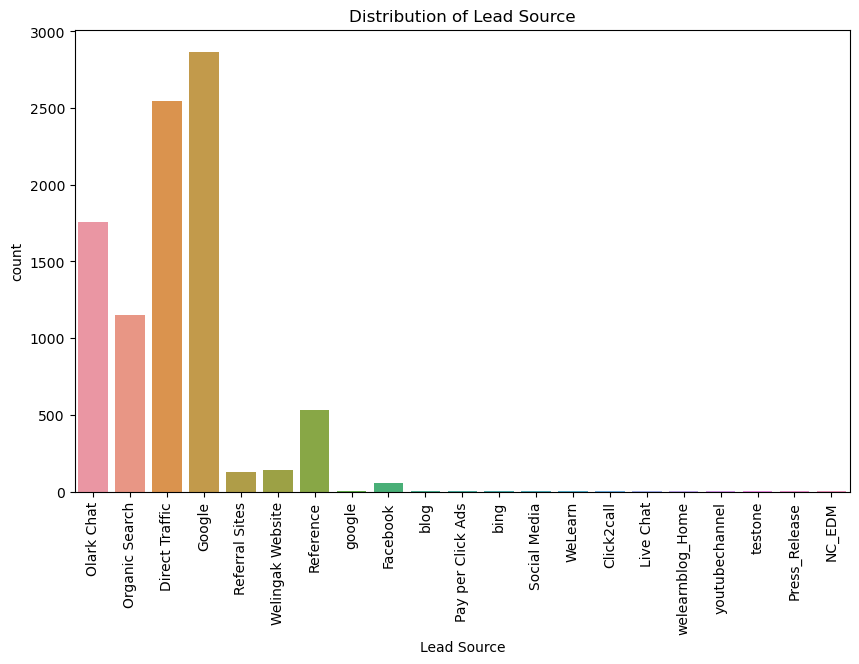

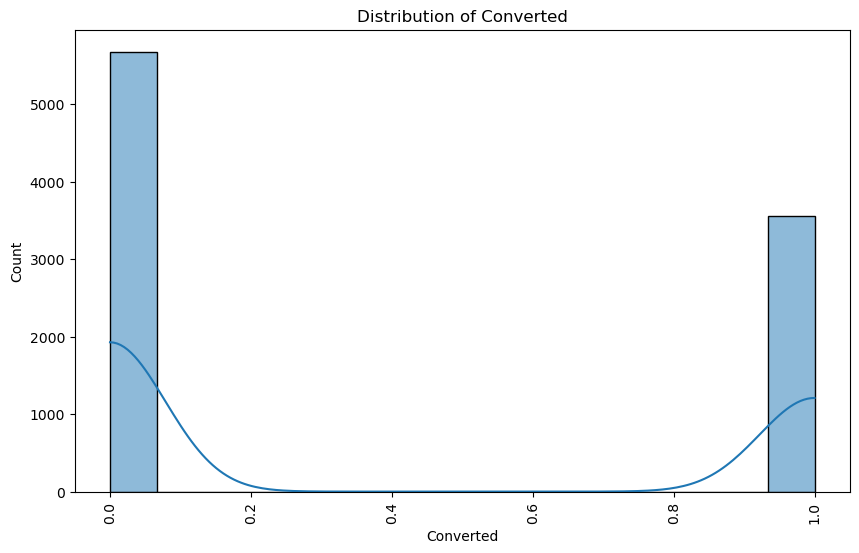

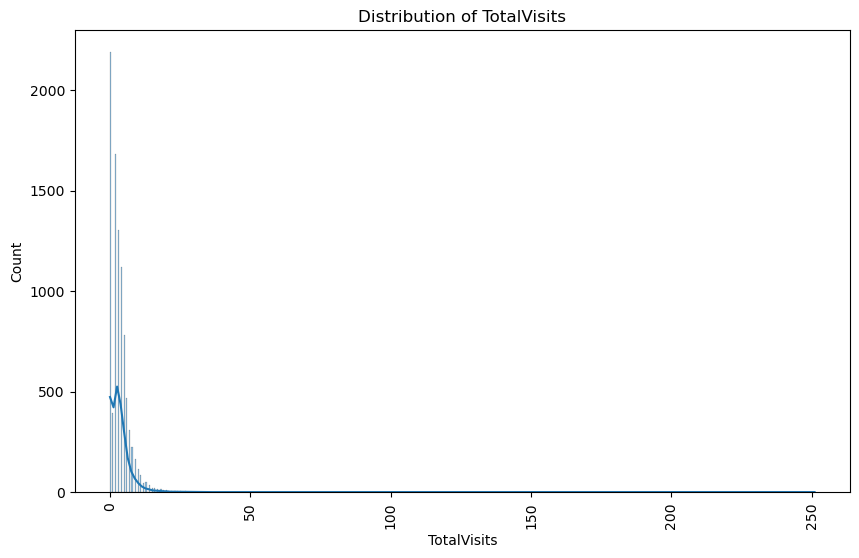

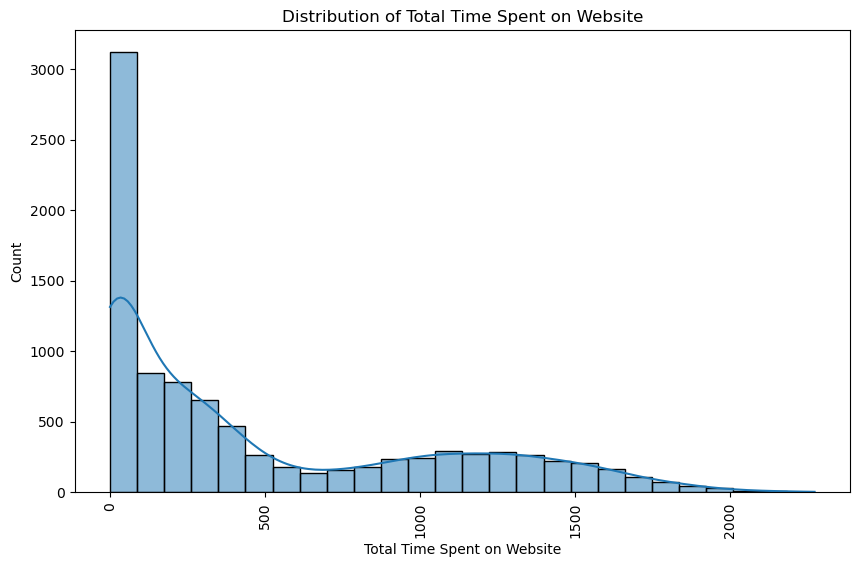

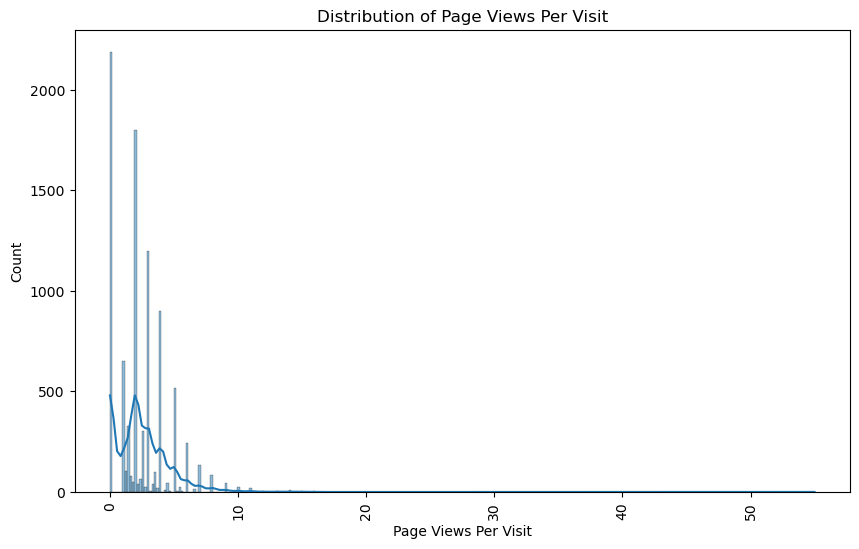

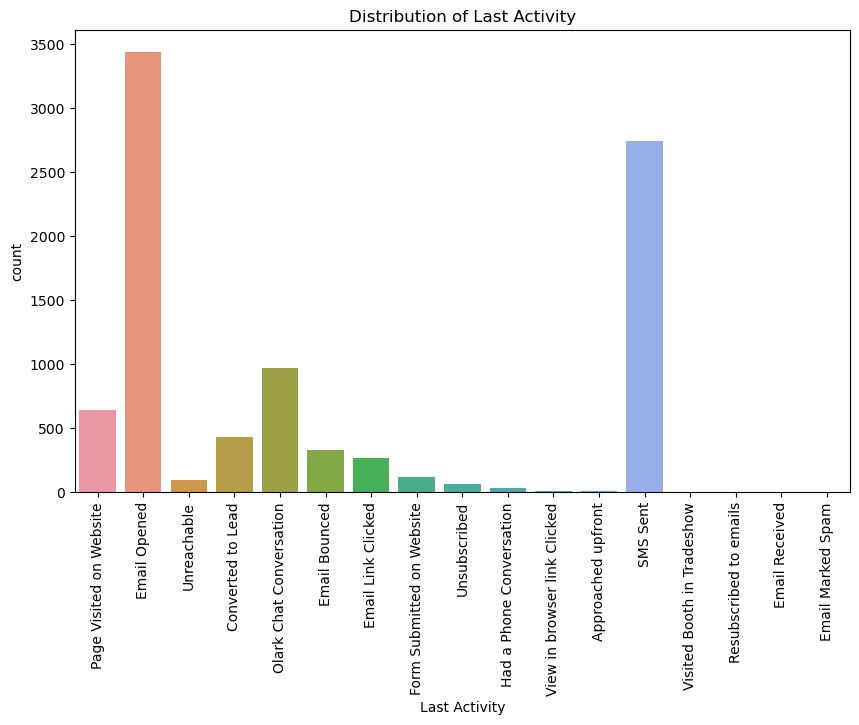

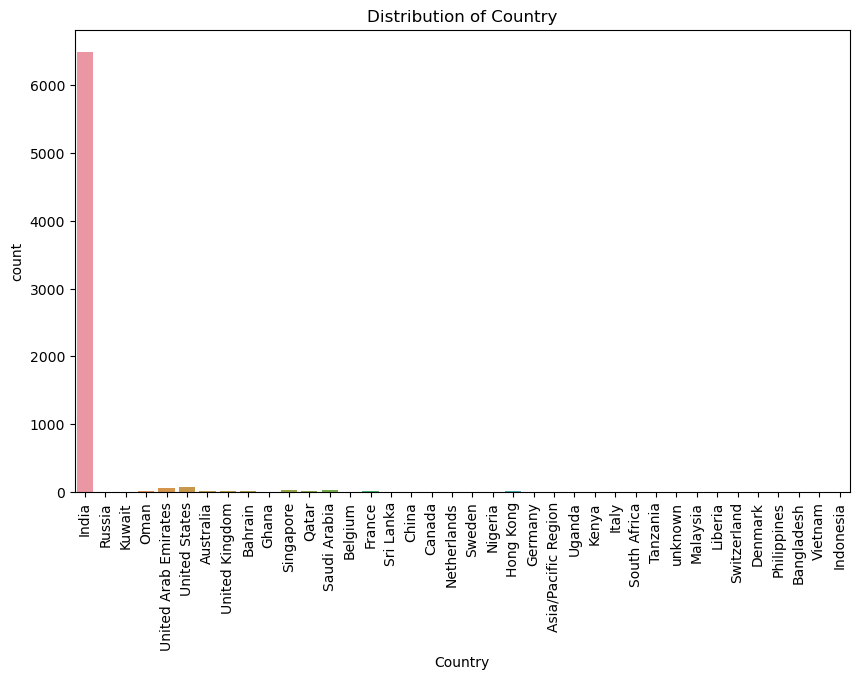

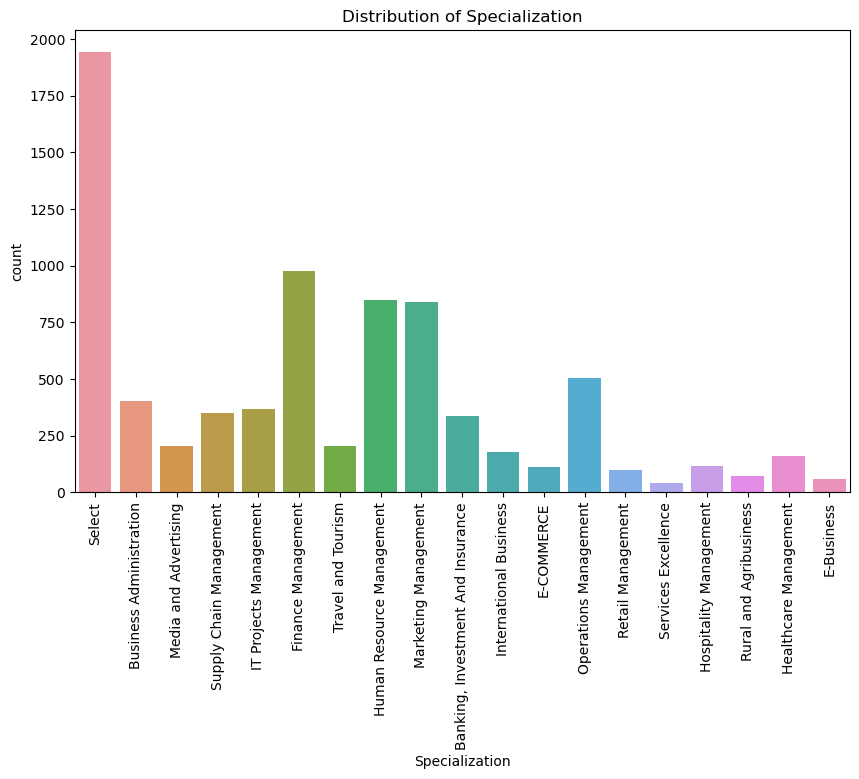

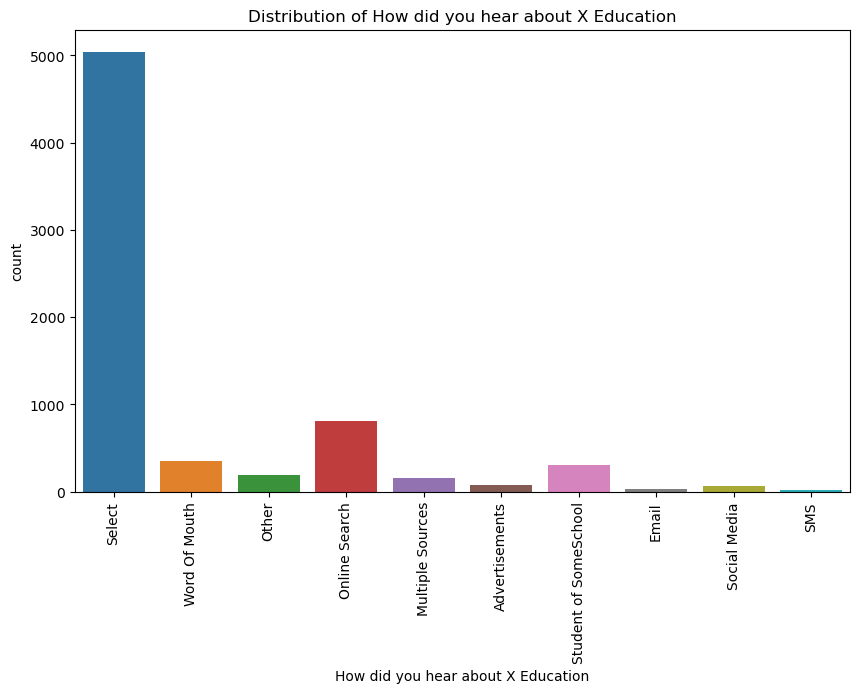

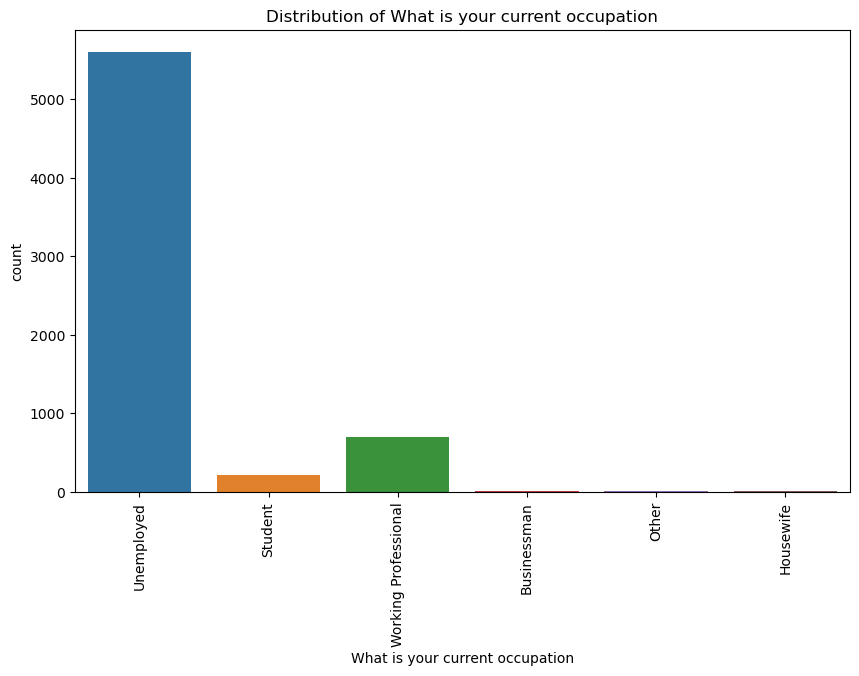

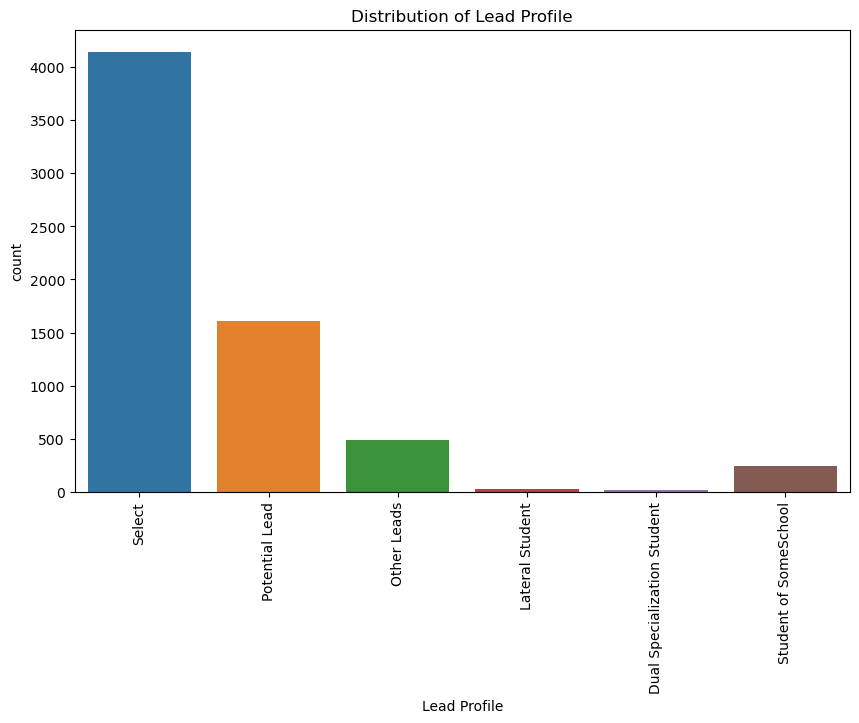

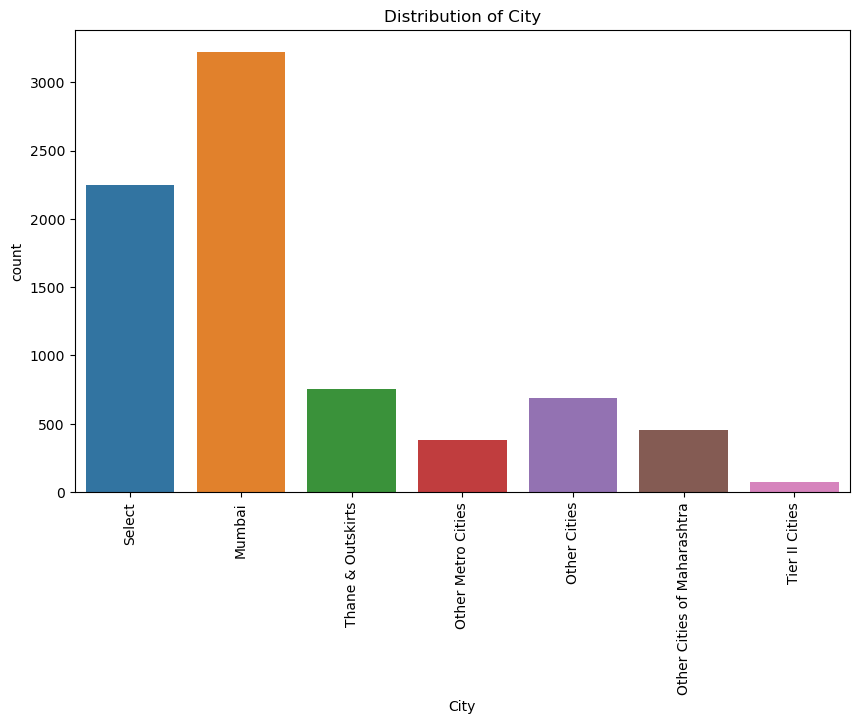

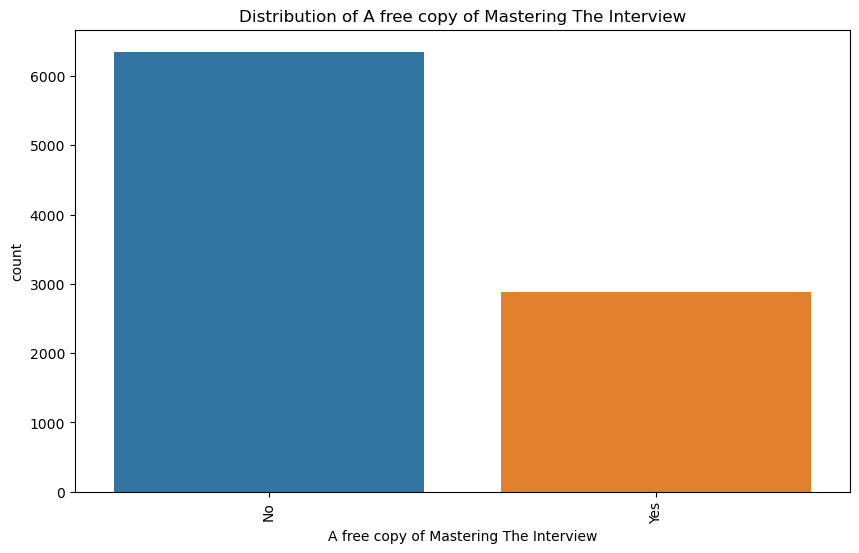

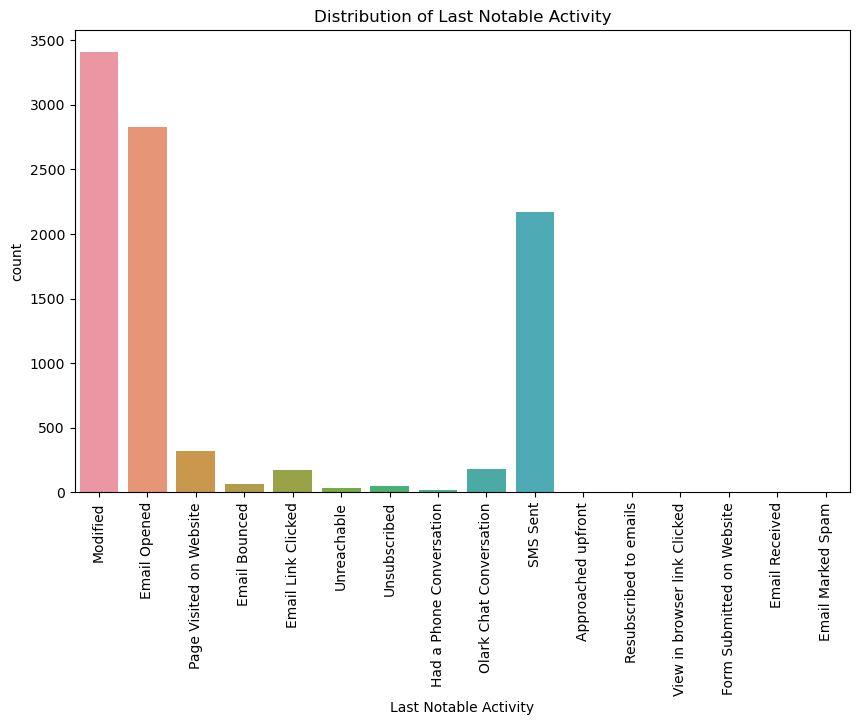

In [27]:
# Checking the value distribution for each of the column

for column in lead_df.columns:
    plt.figure(figsize=(10, 6))
    
    if lead_df[column].dtype == 'object':  # Categorical columns
        sns.countplot(data=lead_df, x=column)
    else:  # Numerical columns
        sns.histplot(data=lead_df, x=column, kde=True)
    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [28]:
#Checking the counf of Select value for each of the columns

target_value = 'Select'

# Initialize a dictionary to store counts for each column
value_counts_dict = {}

# Loop through each column and calculate the count for the target value
for column in lead_df.columns:
    count = lead_df[column].value_counts().get(target_value, 0)  # Get count or 0 if value not present
    value_counts_dict[column] = count

# Print the counts for each column
for column, count in value_counts_dict.items():
    print(f"Count of '{target_value}' in '{column}': {count}")

Count of 'Select' in 'Lead Origin': 0
Count of 'Select' in 'Lead Source': 0
Count of 'Select' in 'Converted': 0
Count of 'Select' in 'TotalVisits': 0
Count of 'Select' in 'Total Time Spent on Website': 0
Count of 'Select' in 'Page Views Per Visit': 0
Count of 'Select' in 'Last Activity': 0
Count of 'Select' in 'Country': 0
Count of 'Select' in 'Specialization': 1942
Count of 'Select' in 'How did you hear about X Education': 5043
Count of 'Select' in 'What is your current occupation': 0
Count of 'Select' in 'Lead Profile': 4146
Count of 'Select' in 'City': 2249
Count of 'Select' in 'A free copy of Mastering The Interview': 0
Count of 'Select' in 'Last Notable Activity': 0


In [29]:
# In the above line we can see 4columns have a high number of select values which can be considered as null values
# Since select value can be considered as null value therefore replacing Select with null value
value_to_replace = 'Select'

# List of columns which has Select values
columns_to_replace = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# Replace the value with NaN in the specified columns
lead_df[columns_to_replace] = lead_df[columns_to_replace].replace(value_to_replace, pd.NA)

In [30]:
# Now after replacing the Select with null values checking the count of null values in each column
lead_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
Lead Profile                              6855
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [31]:
#Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                                0.000000
Lead Source                                0.389610
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Lead Profile                              74.188312
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [32]:
#Checking for the column having null values more than 40%
null_percentage= lead_df.isnull().mean()*100
null_percentage[null_percentage>40]

How did you hear about X Education    78.463203
Lead Profile                          74.188312
dtype: float64

In [33]:
#Taking the list of the columns having null values more than 40%
null_values_list = null_percentage[null_percentage>40].index.tolist()

In [34]:
# Dropping the column having null values more than 40%, since imputation of values can majorly effect the results of EDA

lead_df.drop(null_values_list, axis = 1, inplace = True)

In [35]:
#Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                                0.000000
Lead Source                                0.389610
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

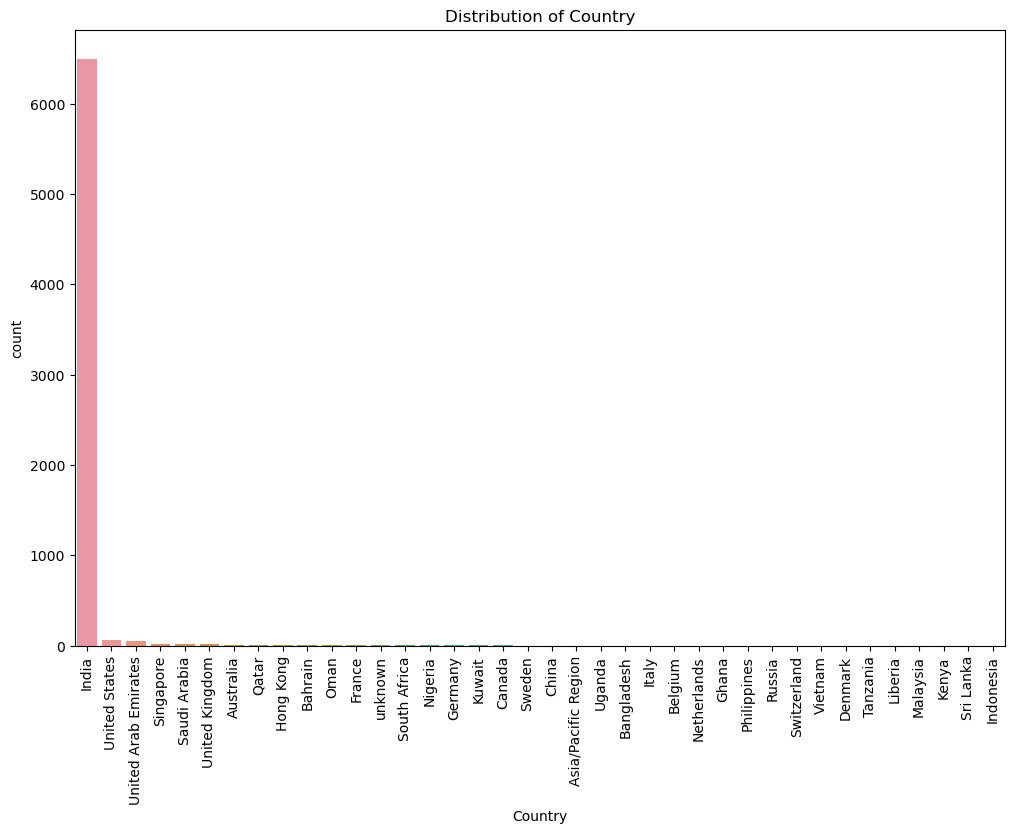

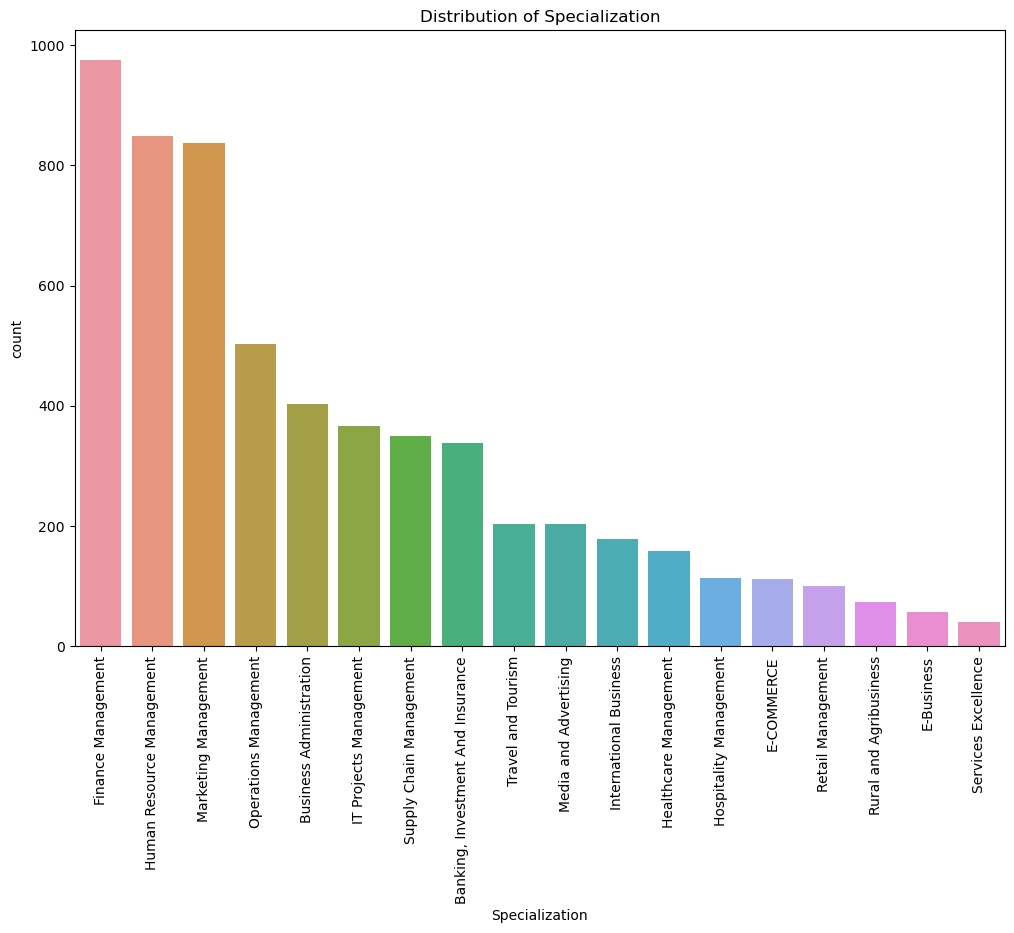

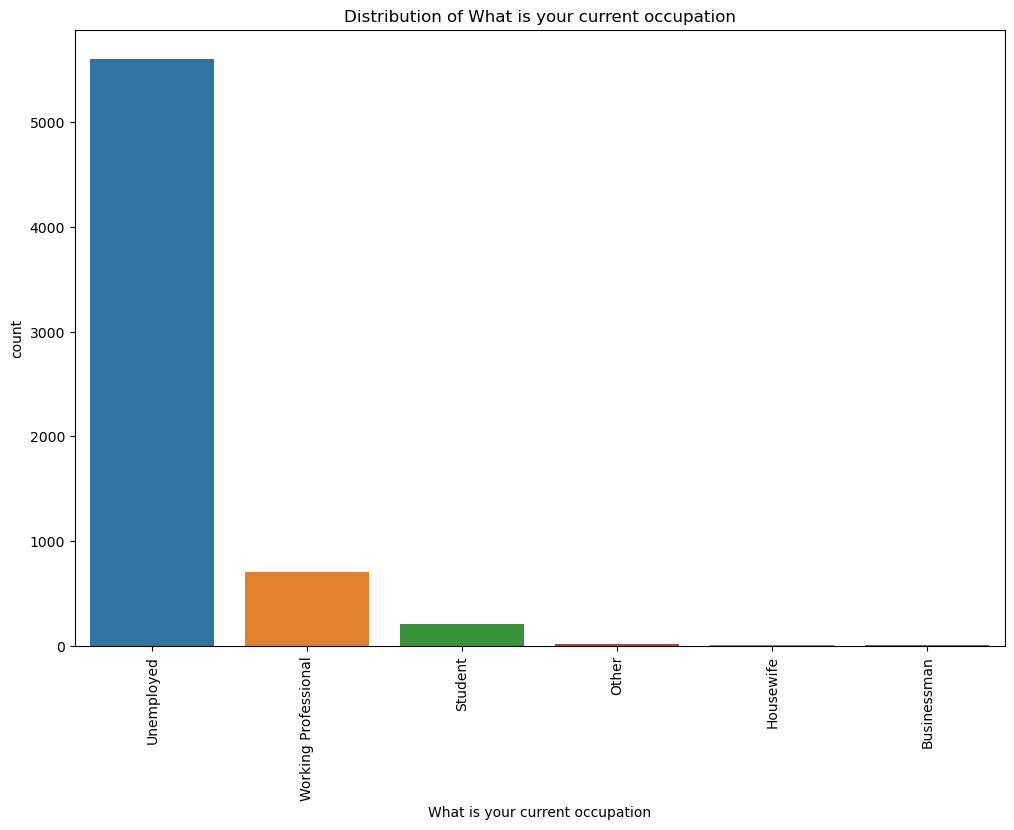

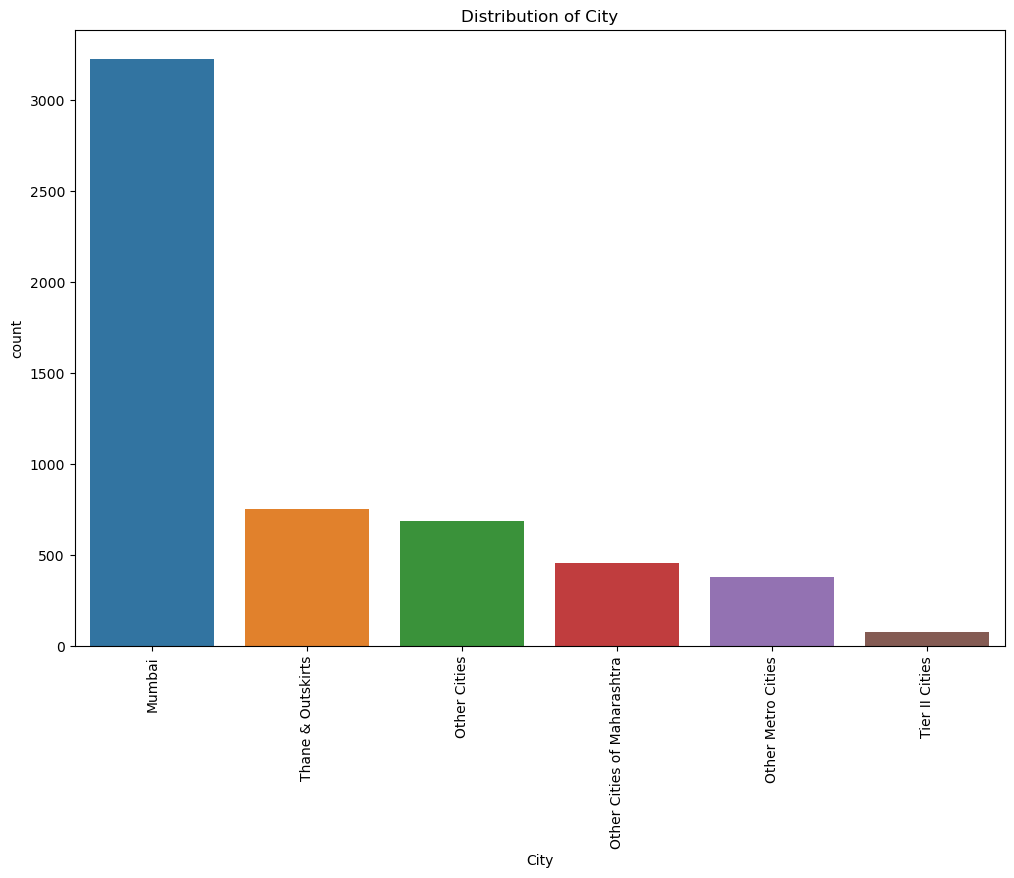

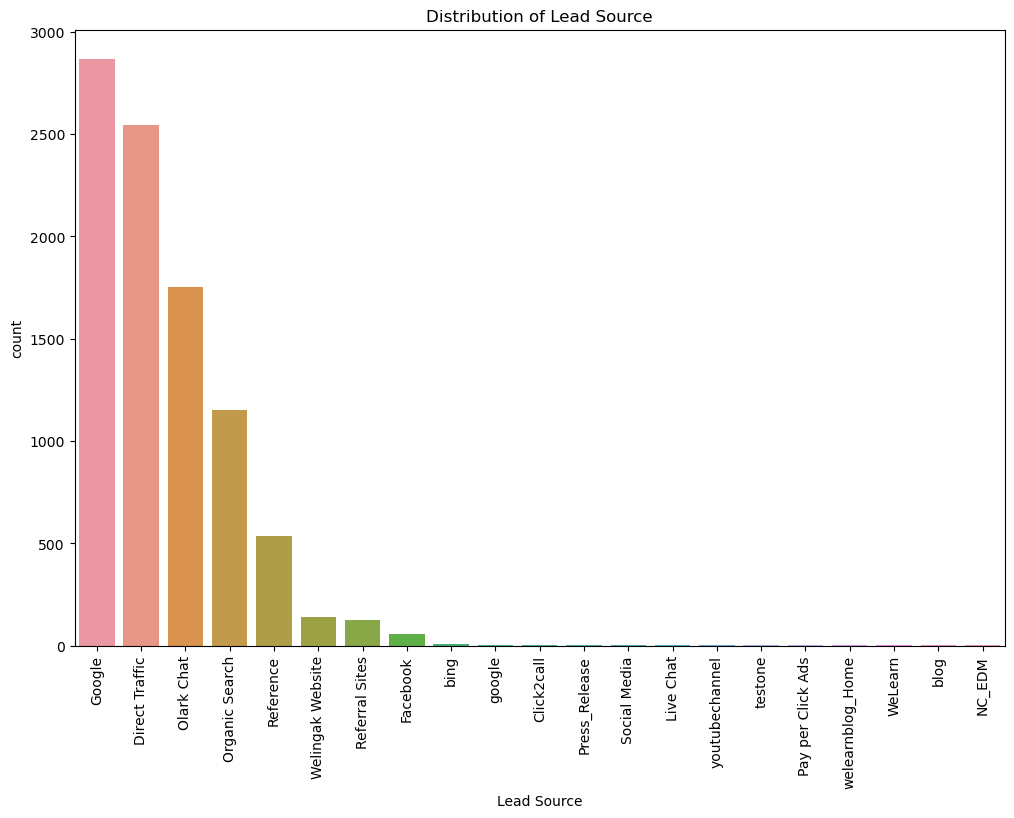

In [36]:
# Checking the values distribution of Country, Specilization, What is your current occupation, Tags and City
value_dist_def = ['Country', 'Specialization', 'What is your current occupation','City','Lead Source']
for column in value_dist_def:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=lead_df, x=column, order=lead_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [37]:
# Since these 4 columns have relatively high percentage of missing values dropping the rows will result in loosing huge amount of data.
# Therefore replacing the null values with the Mode of the data.

# List of columns with null values to replace
columns_to_replace = ['Country', 'Specialization', 'What is your current occupation','City']

# Loop through each column and replace null values with mode
for column in columns_to_replace:
    mode_value = lead_df[column].mode()[0]  # Get the mode value
    lead_df[column].fillna(mode_value, inplace=True)

In [38]:
# Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                               0.000000
Lead Source                               0.389610
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [39]:
# Since columns 'TotalVisits', 'Page Views Per Visit', 'Last Activity' has low null value percentage therefore dropping these rows.
# Dropping these will not result in dropping big crunch of data.

# Drop rows with null values in specific columns
columns_to_check = ['TotalVisits', 'Page Views Per Visit', 'Last Activity']
lead_df = lead_df.dropna(subset=columns_to_check)

In [40]:
# Checking the percentage of null values

null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                               0.000000
Lead Source                               0.318576
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [41]:
lead_df.shape

(9103, 13)

In [42]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64
Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64
0    0.619796
1    0.380204
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0     

## Univariate Analysis and Bivariate Analysis

In [43]:
# Dviding the dataset columns into two parts categorical and continuous
categorical_columns = ['Lead Source','Lead Origin','Last Activity','Country','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']
continuous_columns = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

#### Univariate Analysis

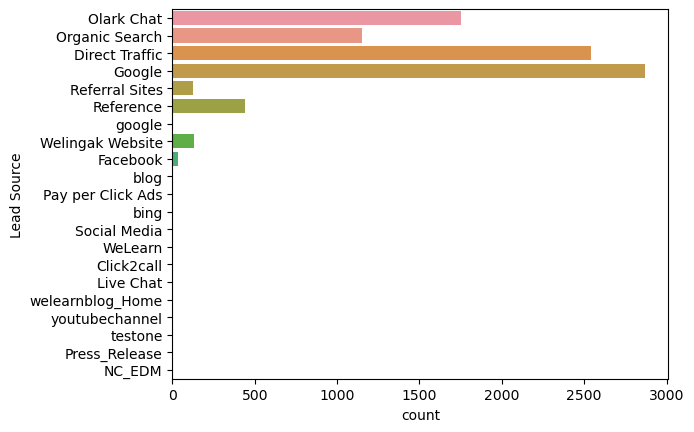

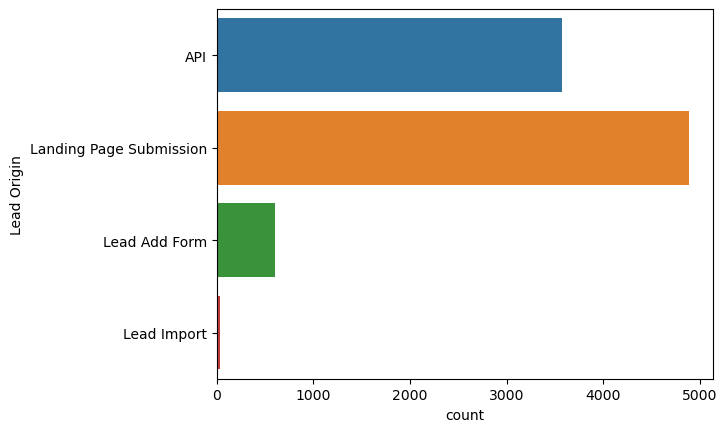

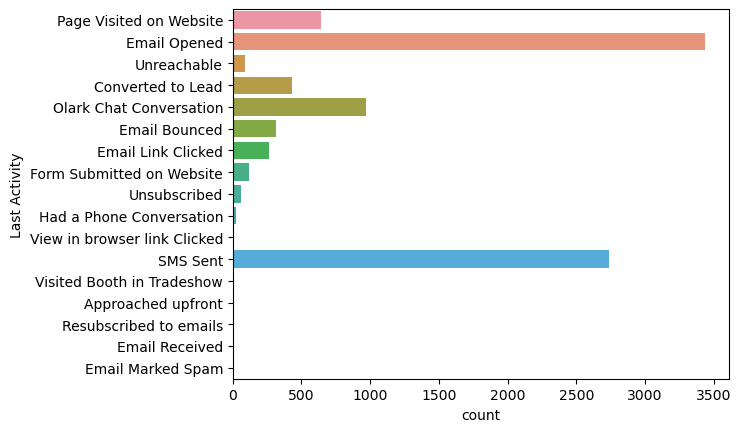

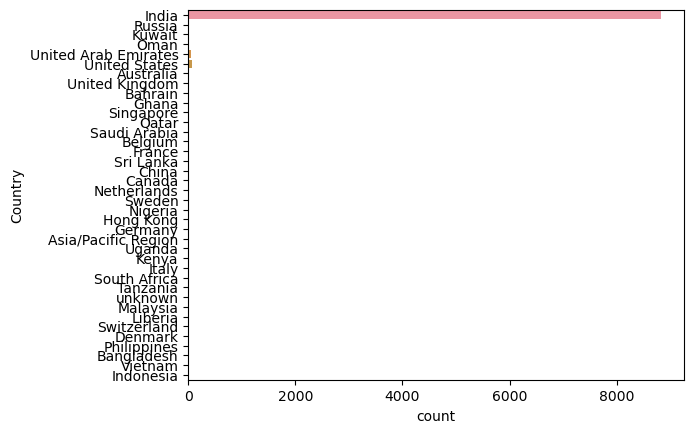

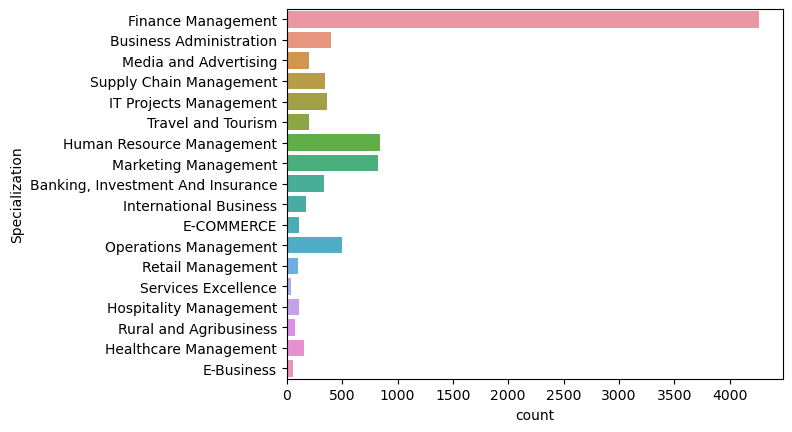

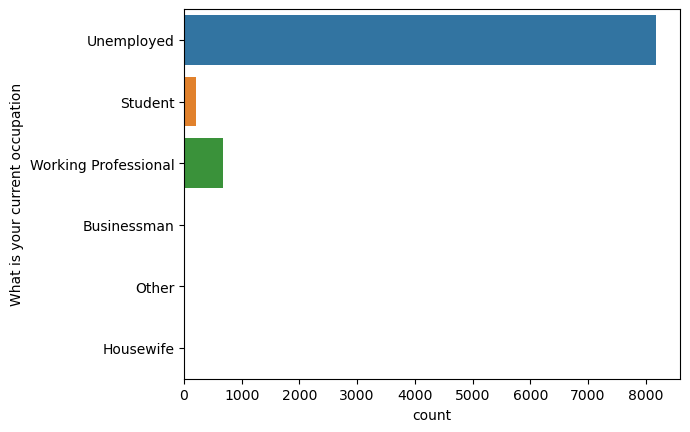

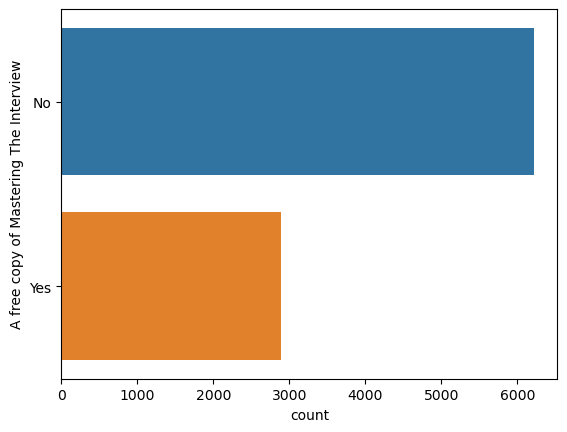

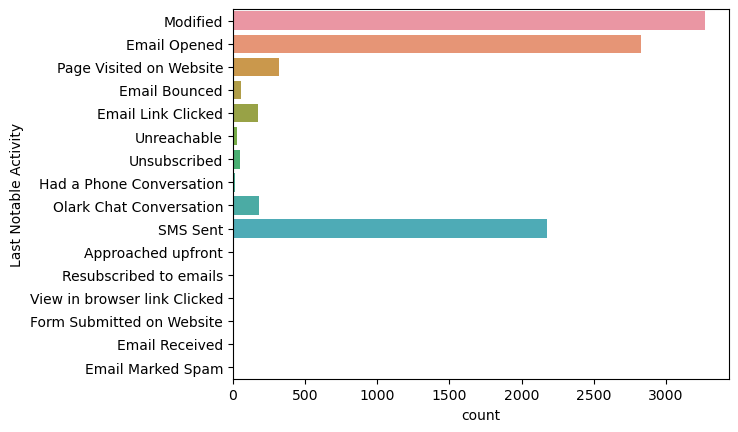

In [44]:
# Making graphs for the categorical variables
for i in categorical_columns:
    sns.countplot(data=lead_df,y=i)
    plt.show()

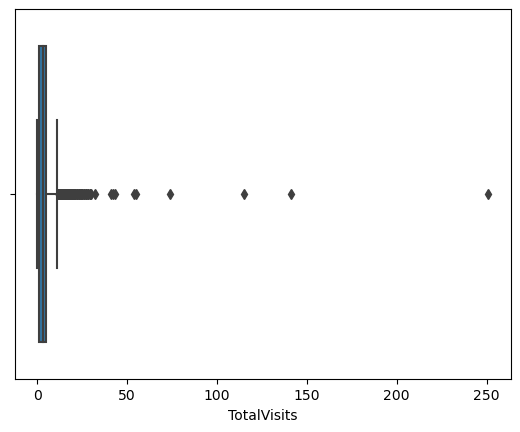

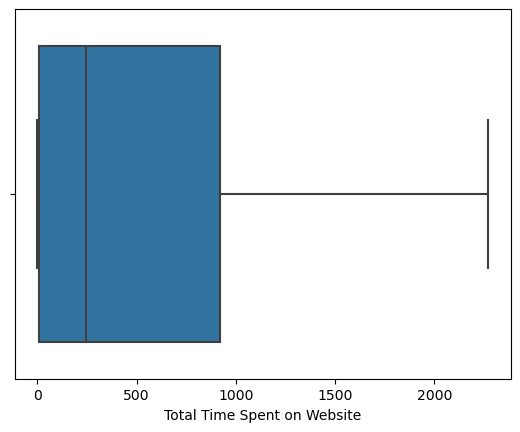

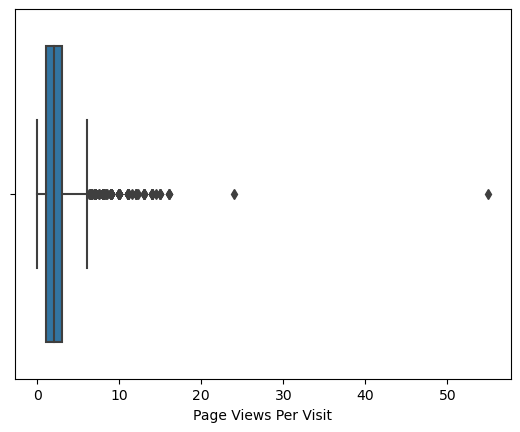

In [45]:
# Making grphs for the continuous variables
for i in continuous_columns:
    sns.boxplot(lead_df[i])
    plt.show()

### Bi-variate Analysis

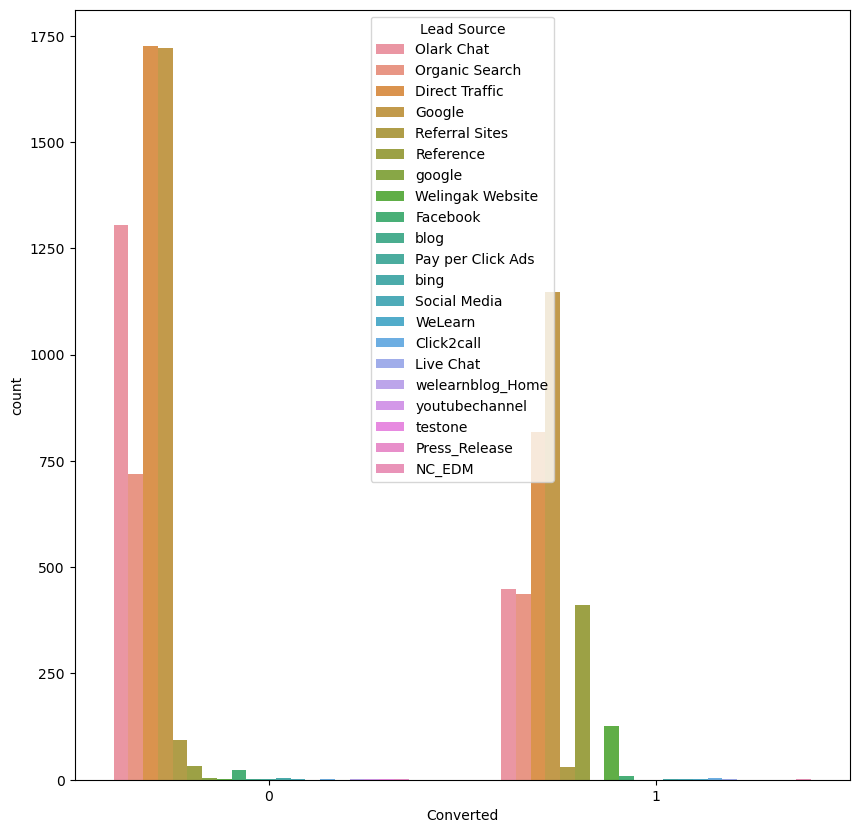

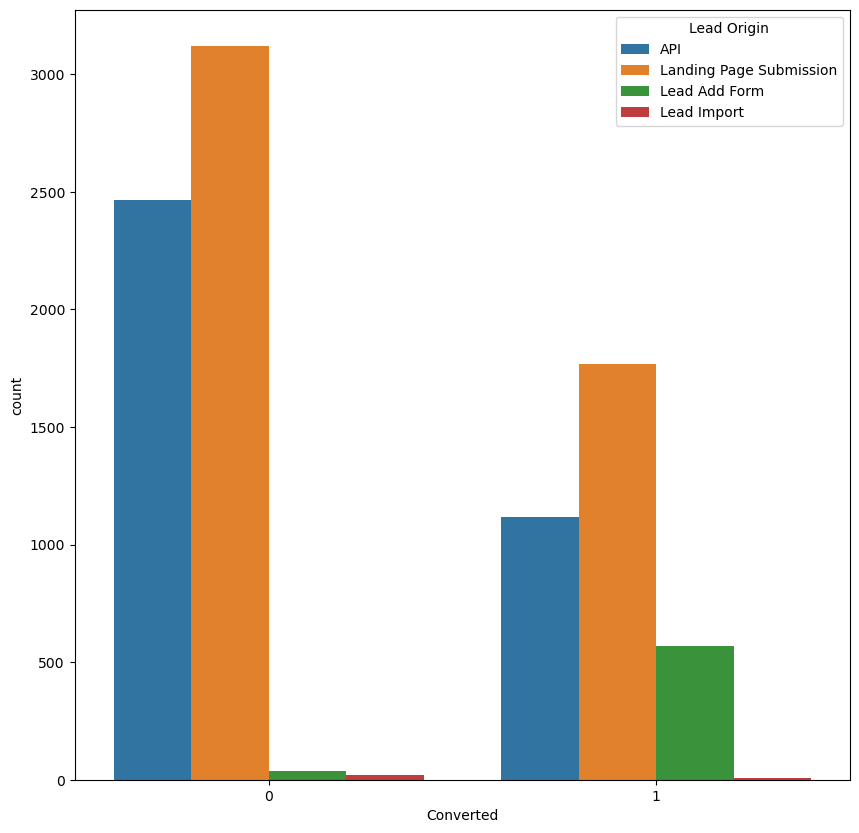

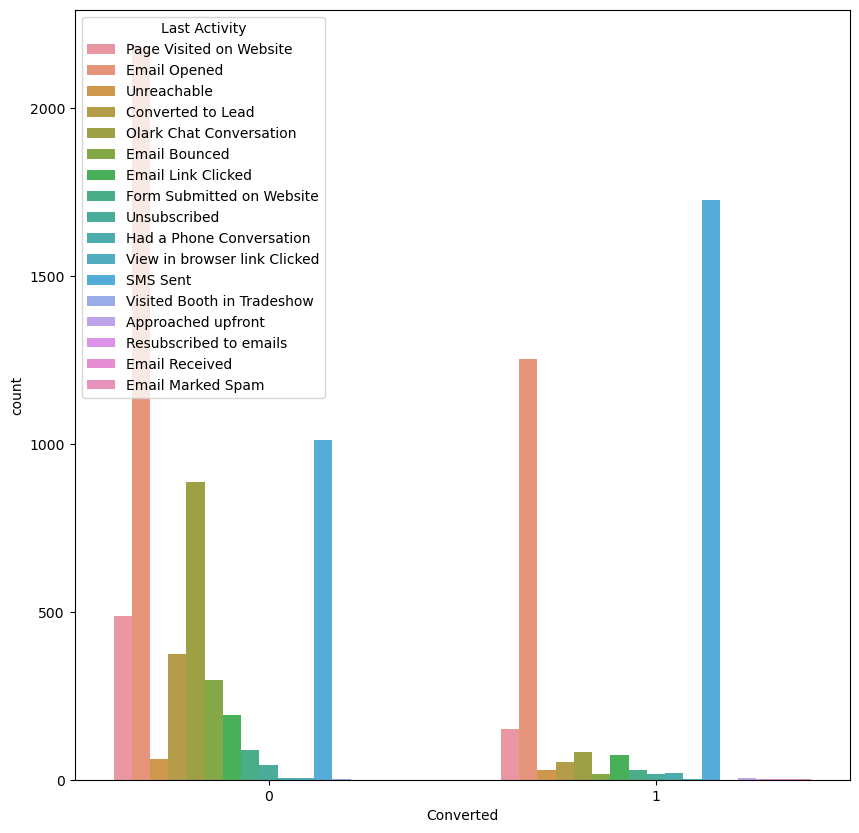

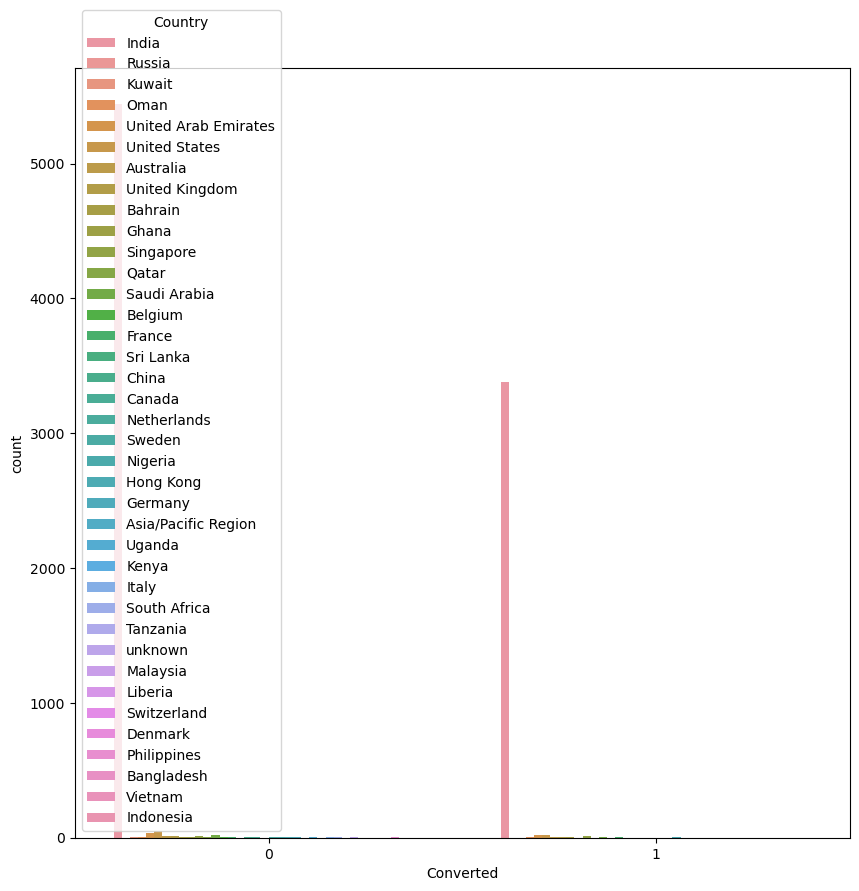

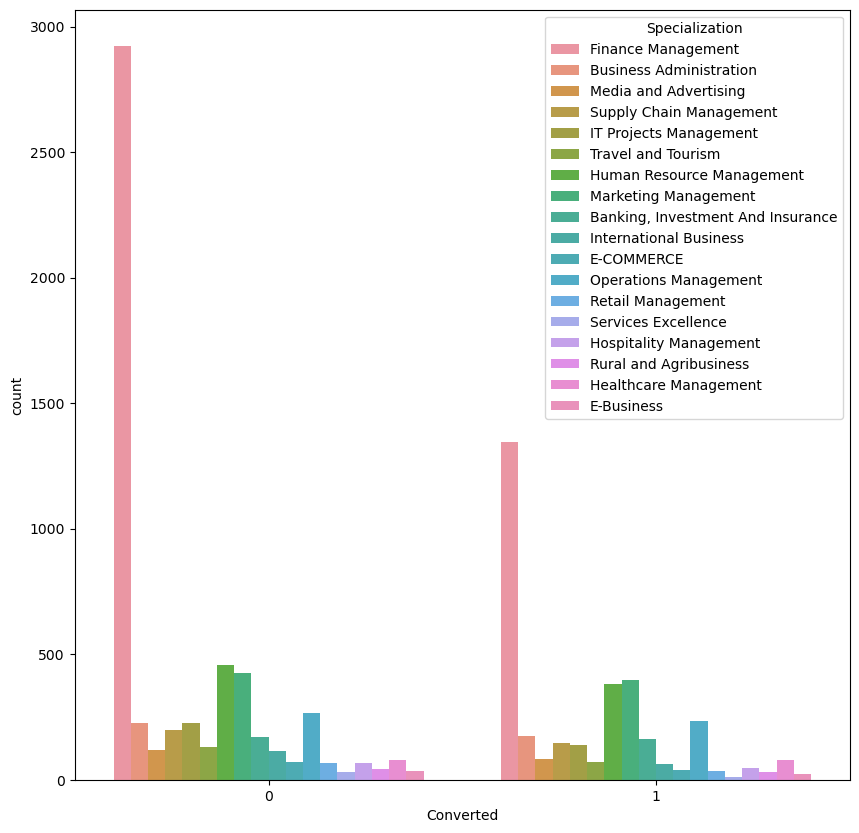

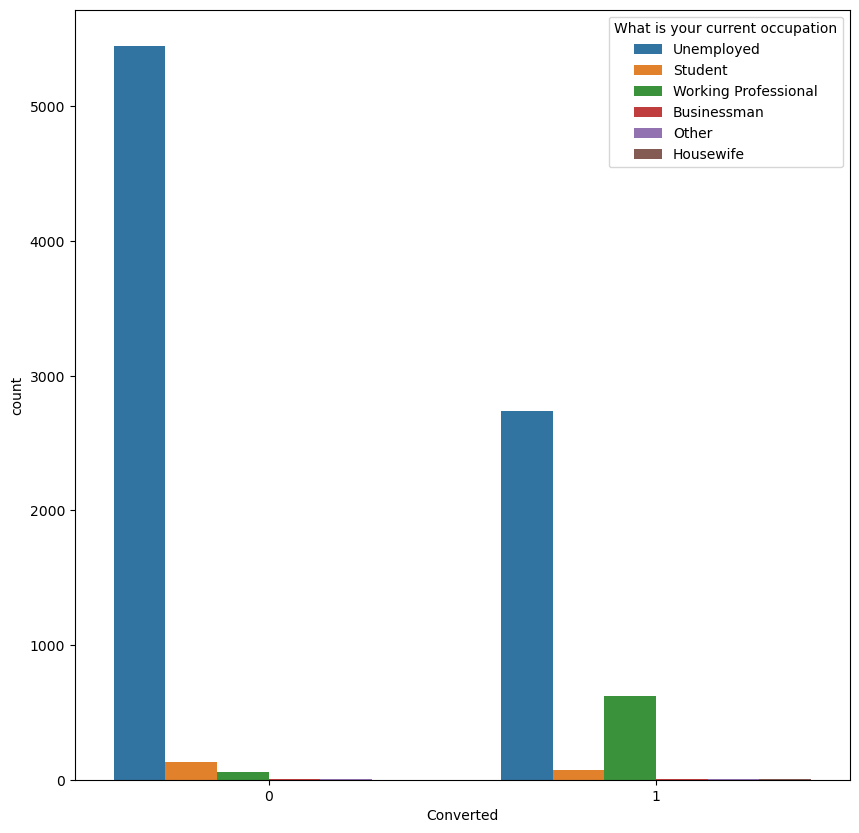

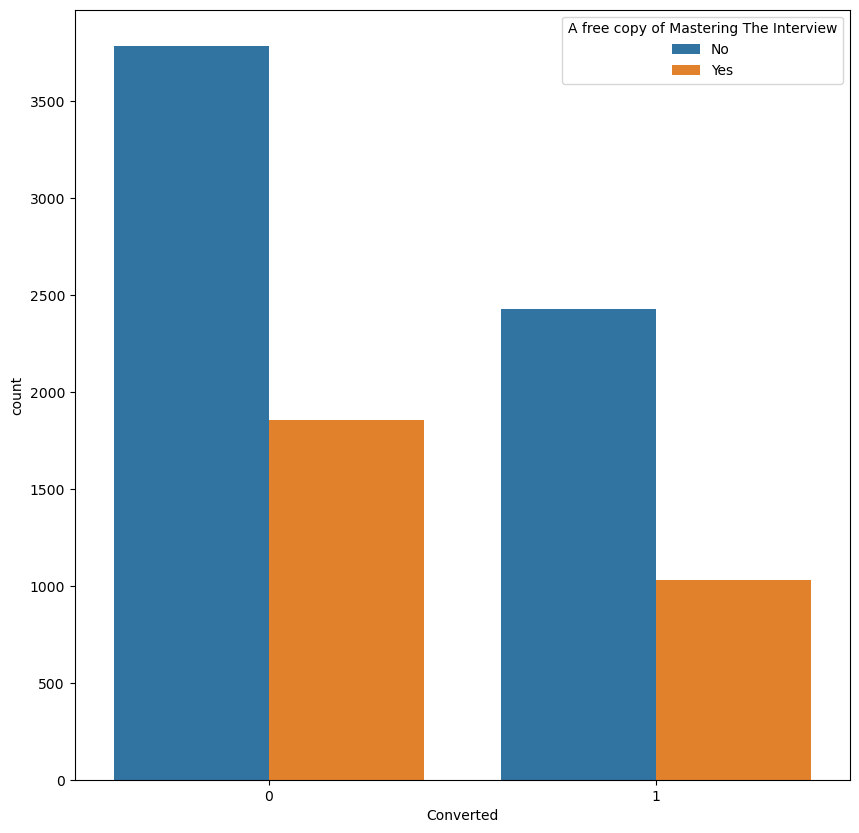

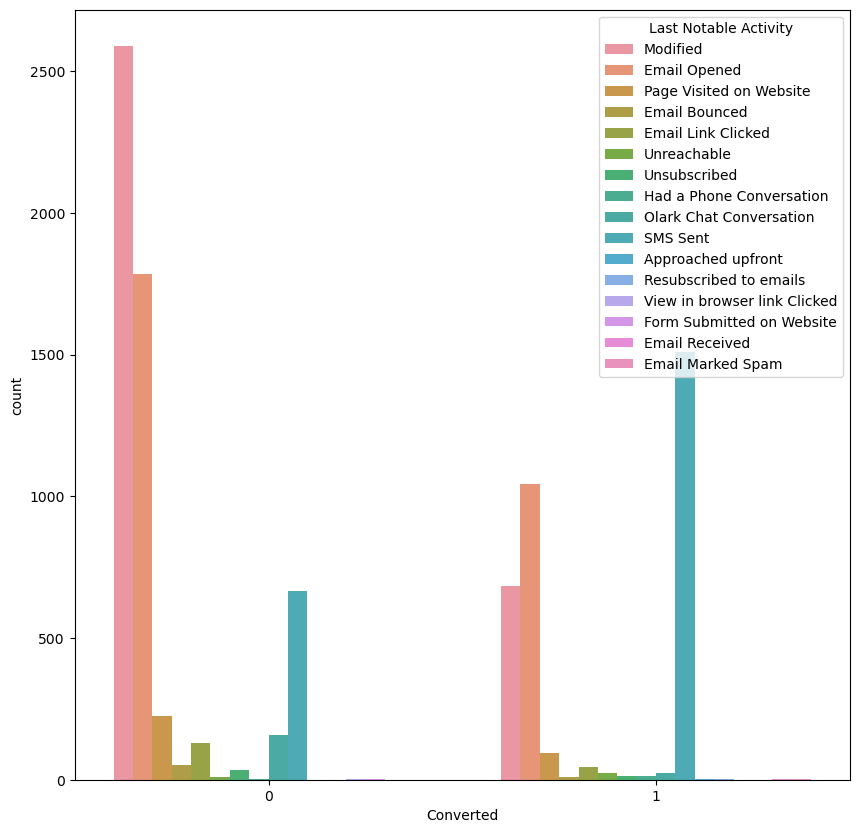

In [46]:
# Graphs of categorical columns
for i in categorical_columns:
    plt.figure(figsize=(10,10))
    sns.countplot(data = lead_df , x="Converted" , hue=i)
    plt.show()

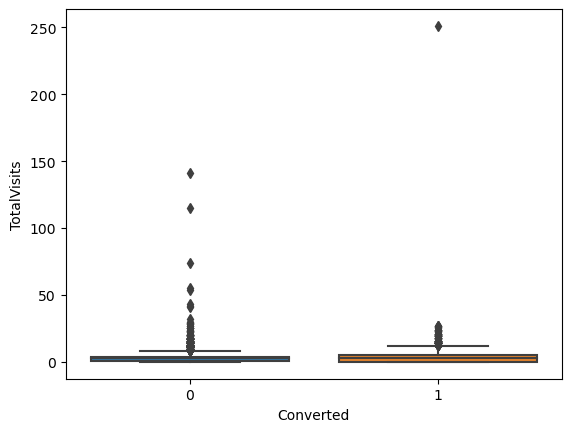

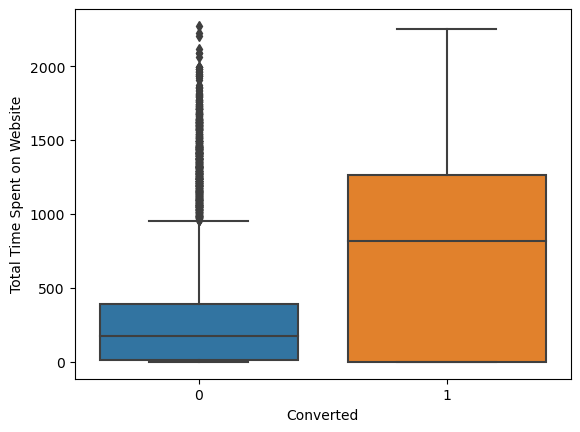

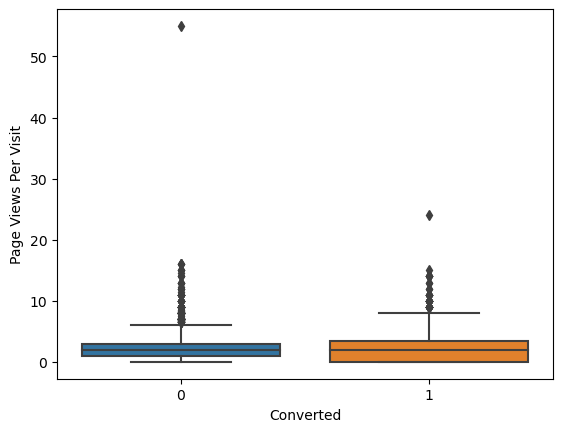

In [47]:
# Graphs of continuous_columns
for i in continuous_columns:
    sns.boxplot(x="Converted",y=i,data = lead_df)
    plt.show()

In [48]:
Lead_source_pivot=pd.pivot_table(data=lead_df,values='Converted',index=['Lead Source'],aggfunc='sum')

Lead_source_pivot_cnt=pd.pivot_table(data=lead_df,values='Converted',index=['Lead Source'],aggfunc='count')

Lead_source_pivot_df=pd.concat([Lead_source_pivot,Lead_source_pivot_cnt],axis=1)

Lead_source_pivot_df.columns=['Converted','Total']

Lead_source_pivot_df['Value_in_per']=Lead_source_pivot_df['Converted']/Lead_source_pivot_df['Total']

Lead_source_pivot_df['Value_in_per']=Lead_source_pivot_df['Value_in_per'].map('{:.2%}'.format)

Lead_source_pivot_df

,Converted,Total,Value_in_per
Lead Source,,,
Click2call,3,4,75.00%
Direct Traffic,818,2543,32.17%
Facebook,9,31,29.03%
Google,1147,2868,39.99%
Live Chat,2,2,100.00%
NC_EDM,1,1,100.00%
Olark Chat,448,1753,25.56%
Organic Search,436,1154,37.78%
Pay per Click Ads,0,1,0.00%


### Observation
- Lead conversion are good lead source of Google and Direct Traffic with Lead converation rate of  32% and 40% respectively 
- Lead conversion rates are very high for lead source of Wellingak Website and Reference 

### Obsevation based on Lead Origin

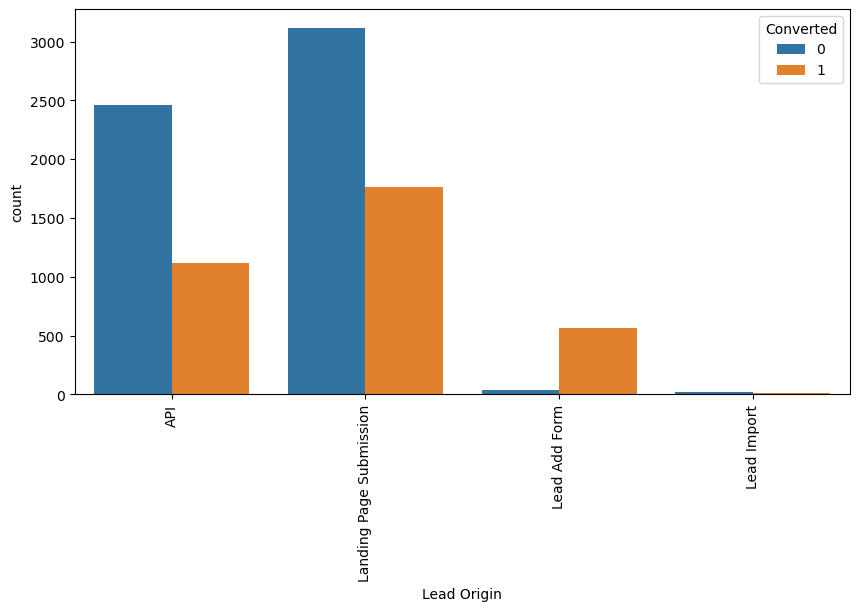

In [49]:
plt.figure(figsize=(10,5))

sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)

plt.xticks(rotation=90)

plt.show()

In [50]:
Lead_Origin_pivot=pd.pivot_table(data=lead_df,values='Converted',index=['Lead Origin'],aggfunc='sum')

Lead_Origin_pivot_cnt=pd.pivot_table(data=lead_df,values='Converted',index=['Lead Origin'],aggfunc='count')

Lead_Origin_pivot_df=pd.concat([Lead_Origin_pivot,Lead_Origin_pivot_cnt],axis=1)

Lead_Origin_pivot_df.columns=['Converted','Total']

Lead_Origin_pivot_df['Value_in_per']=Lead_Origin_pivot_df['Converted']/Lead_Origin_pivot_df['Total']

Lead_Origin_pivot_df['Value_in_per']=Lead_Origin_pivot_df['Value_in_per'].map('{:.2%}'.format)

Lead_Origin_pivot_df

,Converted,Total,Value_in_per
Lead Origin,,,
API,1115,3578,31.16%
Landing Page Submission,1768,4886,36.19%
Lead Add Form,569,608,93.59%
Lead Import,9,31,29.03%


### Observation:

- Lead Source API and Landing Page Submission have higher lead conversion with lead conversion rates of 31% and 36% respectively.
- However, the lead conversion rate from the Lead Add Form is approximately 94%.

#### Hence to improve company's overall Conversion rate one most start to generate more leads from Lead Add Form

### Obsevation based on Last Activity

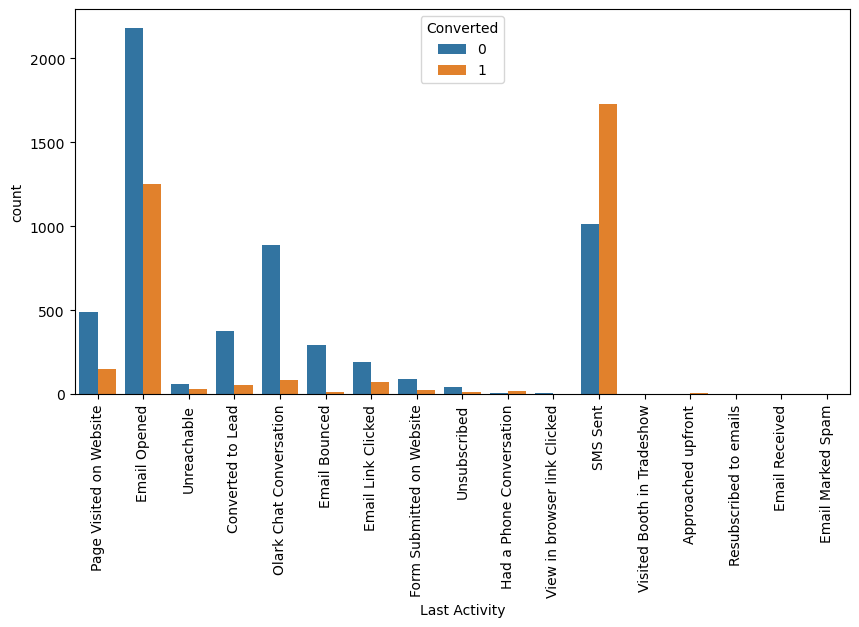

In [51]:
plt.figure(figsize=(10,5))

sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)

plt.xticks(rotation=90)

plt.show()

In [52]:
Lead_Activity_pivot=pd.pivot_table(data=lead_df,values='Converted',index=['Last Activity'],aggfunc='sum')

Lead_Activity_pivot_cnt=pd.pivot_table(data=lead_df,values='Converted',index=['Last Activity'],aggfunc='count')

Lead_Activity_pivot_df=pd.concat([Lead_Activity_pivot,Lead_Activity_pivot_cnt],axis=1)

Lead_Activity_pivot_df.columns=['Converted','Total']

Lead_Activity_pivot_df['Value_in_per']=Lead_Activity_pivot_df['Converted']/Lead_Activity_pivot_df['Total']

Lead_Activity_pivot_df['Value_in_per']=Lead_Activity_pivot_df['Value_in_per'].map('{:.2%}'.format)

Lead_Activity_pivot_df

,Converted,Total,Value_in_per
Last Activity,,,
Approached upfront,5,5,100.00%
Converted to Lead,54,428,12.62%
Email Bounced,16,312,5.13%
Email Link Clicked,73,267,27.34%
Email Marked Spam,2,2,100.00%
Email Opened,1253,3437,36.46%
Email Received,2,2,100.00%
Form Submitted on Website,28,116,24.14%
Had a Phone Conversation,20,25,80.00%


### Observation:

- Last lead activity of SMS Sent and Email Opened Submission have higher lead conversion with lead conversion rates of 63% and 36% respectively.
- However, the lead conversion rate from the of last lead activity of having a phone conversation is approximately 80%

In [53]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Mumbai,No,Modified


### Obsevation based on current occupation

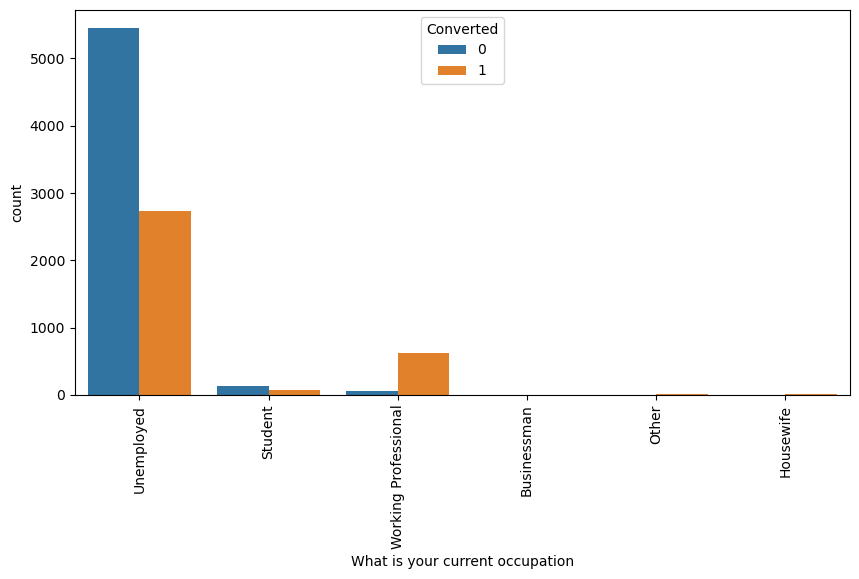

In [54]:
plt.figure(figsize=(10,5))

sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)

plt.xticks(rotation=90)

plt.show()

In [55]:
Lead_prof_pivot=pd.pivot_table(data=lead_df,values='Converted',index=['What is your current occupation'],aggfunc='sum')

Lead_prof_pivot_cnt=pd.pivot_table(data=lead_df,values='Converted',index=['What is your current occupation'],aggfunc='count')

Lead_prof_pivot_df=pd.concat([Lead_prof_pivot,Lead_prof_pivot_cnt],axis=1)

Lead_prof_pivot_df.columns=['Converted','Total']

Lead_prof_pivot_df['Value_in_per']=Lead_prof_pivot_df['Converted']/Lead_prof_pivot_df['Total']

Lead_prof_pivot_df['Value_in_per']=Lead_prof_pivot_df['Value_in_per'].map('{:.2%}'.format)

Lead_prof_pivot_df

,Converted,Total,Value_in_per
What is your current occupation,,,
Businessman,5,8,62.50%
Housewife,9,9,100.00%
Other,9,15,60.00%
Student,75,207,36.23%
Unemployed,2739,8185,33.46%
Working Professional,624,679,91.90%


### Observation:

- lead who are currently unemployed have higher lead conversion with lead conversion rate of 33% respectively.

- However, the lead conversion rate for Working Professional seems to be 92%.

#### Hence to improve company's overall Conversion rate one most start to generate more leads from Working Professional

### Data Preperation

In [56]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64
Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64
0    0.619796
1    0.380204
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0     

### Mapping of Yes and Nos for the column "A free copy of Mastering The Interview"

In [57]:
lead_df["A free copy of Mastering The Interview"] = lead_df["A free copy of Mastering The Interview"].map({"Yes" : 1 , "No" : 0})

### Making dummies for categorical Columns

In [58]:
# for categorical columns making dummies
dummy_data = pd.get_dummies(lead_df[["Lead Source","Lead Origin","Country","Last Activity","Last Notable Activity","Specialization","What is your current occupation","City"]],drop_first = True)
dummy_data.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Concatenating the Dummy variables with the dataframes

In [59]:
# Concatinating the lead and dummy data
lead_df = pd.concat([lead_df,dummy_data], axis=1)
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Dropping the columns which are already maked as dummy 
lead_df = lead_df.drop(columns=["Lead Source","Lead Origin","Country","Last Activity","Last Notable Activity","Specialization","What is your current occupation","City"], axis=1)
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Splitting the data into Train and Test set 

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = lead_df.drop(columns = ["Converted"] , axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
y = lead_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Splitting the data for train and test set.
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 ,test_size = 0.3 , random_state = 100)

### Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

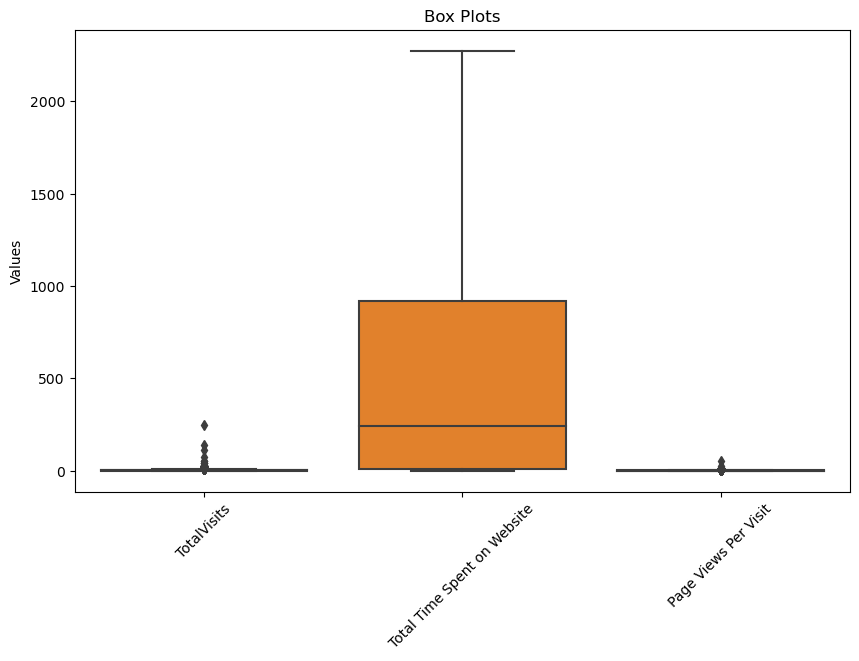

In [66]:
# Plotting boxplot to check for ay outlier values
columns_to_plot = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] 

plt.figure(figsize=(10, 6))
sns.boxplot(data=lead_df[columns_to_plot])
plt.title("Box Plots")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [67]:
# Since there are no major outliears therefore using MinMax Scalar for standardising the data
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.013831,0.213330,0.043001,0.316855,0.275424,0.004080,0.319523,0.000314,0.000157,0.190992,...,0.001099,0.001883,0.020559,0.901601,0.073917,0.076899,0.048807,0.040176,0.080979,0.008475
std,0.020226,0.242150,0.039914,0.465287,0.446763,0.063752,0.466328,0.017715,0.012527,0.393113,...,0.033129,0.043359,0.141913,0.297877,0.261657,0.266452,0.215482,0.196387,0.272825,0.091674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003984,0.003995,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.107856,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.407457,0.054545,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection using RFE

In [68]:
# Importing all the libraries related to model Building 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [69]:
logreg = LogisticRegression()

In [70]:
rfe = RFE(logreg, n_features_to_select = 30)            
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False])

In [72]:
#List of variables selected in top 30 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 79),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 64),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 55),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 89),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 20),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 42),
 ('Lead Source_welearnblog_Home', False, 33),
 ('Lead Source_youtubechannel', False, 61),
 ('Lead Origin_Landing Page Submission', False

In [73]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_google', 'Lead Origin_Lead Add Form', 'Country_Canada',
       'Country_Italy', 'Country_Nigeria', 'Country_Qatar',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Specialization_E-Business', 'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is you

In [74]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_China', 'Country_Denmark', 'Country_France',
       'Country_Germany', 'Country_Ghana', 'Country_Hong Kong',
       'Country_India', 'Country_Indonesia', 'Country_Kenya', 'Country_Kuwait',
       'Country_Liberia', 'Country_Malaysia', 'Country_Netherlands',
       'Country_Oman', 'Country_Philippines', 'Country_Russia',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_South Africa',
 

### VIF Calculation function

In [75]:
# Function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [76]:
# dataframe with RFE selected variables

X_train_rfe_1 = X_train[col]

In [77]:
# Checking th Variance Inflation Factor for the RFE selected variables

calculateVIF(X_train_rfe_1)

,Features,VIF
21,Last Notable Activity_Resubscribed to emails,inf
19,Last Activity_Resubscribed to emails,inf
28,What is your current occupation_Unemployed,6.54
4,Lead Source_Google,4.35
2,Page Views Per Visit,4.19
3,Lead Source_Direct Traffic,3.86
5,Lead Source_Organic Search,2.65
1,Total Time Spent on Website,2.32
20,Last Notable Activity_Had a Phone Conversation,2.01
17,Last Activity_Had a Phone Conversation,2.01


## Builing 1st Model

In [78]:
# Model 1
X_train_sm_1 = sm.add_constant(X_train_rfe_1)
logm1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.3
Date:                Tue, 15 Aug 2023   Deviance:                       5316.6
Time:                        19:07:06   Pearson chi2:                 6.45e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3895
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4437      0.561     -0.791      0.429      -1.543       0.655
TotalVisits                                              8.5158      2.563      3.323      0.001       3.493      13.538
Total Time Spent on Website                              4.6021      0.164     27.983      0.000       4.280       4.924
Page Views Per Visit                                    -3.6861      1.272     -2.898      0.004      -6.179      -1.193
Lead Source_Direct Traffic                              -1.3013      0.129    -10.089      0.000      -1.554      -1.049
Lead Source_Google                                      -0.9435      0.126     -7.491      0.000      -1.190      -0.697
Lead Source_Organic Search                              -1.0713      0.156     -6.851      0.000      -1.378      -0.765
Lead Source_Referral Sites                              -1.4298      0.359     -3.979      0.000      -2.134      -0.725
Lead Source_Welingak Website                             1.8937      0.756      2.505      0.012       0.412       3.375
Lead Source_bing                                       -22.5081   3.93e+04     -0.001      1.000   -7.71e+04     7.7e+04
Lead Source_google                                     -23.8815   4.26e+04     -0.001      1.000   -8.34e+04    8.34e+04
Lead Origin_Lead Add Form                                2.7936      0.228     12.236      0.000       2.346       3.241
Country_Canada                                         -22.5429   3.62e+04     -0.001      1.000    -7.1e+04    7.09e+04
Country_Italy                                          -24.8197   4.64e+04     -0.001      1.000   -9.09e+04    9.08e+04
Country_Nigeria                                        -23.6194   5.28e+04     -0.000      1.000   -1.03e+05    1.03e+05
Country_Qatar                                          -22.4317   2.74e+04     -0.001      0.999   -5.37e+04    5.37e+04
Last Activity_Converted to Lead                         -1.2339      0.212     -5.813      0.000      -1.650      -0.818
Last Activity_Email Bounced                             -1.9698      0.316     -6.226      0.000      -2.590      -1.350
Last Activity_Had a Phone Conversation                   0.8438      0.812      1.039      0.299      -0.748       2.435
Last Activity_Olark Chat Conversation                   -1.4778      0.160     -9.241      0.000      -1.791      -1.164
Last Activity_Resubscribed to emails                    12.4129   3.97e+04      0.000      1.000   -7.79e+04    7.79e+04
Last Notable Activity_Had a Phone Conversation           2.0580      1.399      1.471      0.141      -0.684       4.800
Last Notable Activity_Resubscribed to emails            12

In [79]:
# Again running the ref to drop next 10 variables

rfe = RFE(logreg, n_features_to_select = 20)            
rfe = rfe.fit(X_train_rfe_1, y_train)

In [80]:
#List of variables selected in top 20 list

list(zip(X_train_rfe_1.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 8),
 ('Lead Source_google', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Country_Canada', False, 4),
 ('Country_Italy', True, 1),
 ('Country_Nigeria', False, 3),
 ('Country_Qatar', False, 2),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Resubscribed to emails', False, 6),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Resubscribed to emails', False, 11),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Unreachable', T

In [81]:
# selecting the selected variable via RFE in col list

col2 = X_train_rfe_1.columns[rfe.support_]
print(col2)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Lead Origin_Lead Add Form', 'Country_Italy',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')


In [82]:
# checking which columns has been rejected

X_train_rfe_1.columns[~rfe.support_]

Index(['Lead Source_bing', 'Country_Canada', 'Country_Nigeria',
       'Country_Qatar', 'Last Activity_Resubscribed to emails',
       'Last Notable Activity_Resubscribed to emails',
       'Specialization_E-Business', 'Specialization_Services Excellence',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed'],
      dtype='object')

In [83]:
# dataframe with RFE selected variables

X_train_rfe_2 = X_train[col2]

In [84]:
# Checking th Variance Inflation Factor for the RFE selected variables

calculateVIF(X_train_rfe_2)

,Features,VIF
2,Page Views Per Visit,4.18
4,Lead Source_Google,2.79
3,Lead Source_Direct Traffic,2.46
1,Total Time Spent on Website,2.32
5,Lead Source_Organic Search,2.06
13,Last Activity_Had a Phone Conversation,2.01
15,Last Notable Activity_Had a Phone Conversation,2.01
0,TotalVisits,1.99
9,Lead Origin_Lead Add Form,1.45
16,Last Notable Activity_SMS Sent,1.42


## Building 2nd Model

In [85]:
# Model 2
X_train_sm_2 = sm.add_constant(X_train_rfe_2)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.1
Date:                Tue, 15 Aug 2023   Deviance:                       5342.3
Time:                        19:07:06   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2465      0.085    -14.679      0.000      -1.413      -1.080
TotalVisits                                              8.5012      2.562      3.318      0.001       3.479      13.523
Total Time Spent on Website                              4.5991      0.164     28.033      0.000       4.278       4.921
Page Views Per Visit                                    -3.6359      1.267     -2.870      0.004      -6.119      -1.153
Lead Source_Direct Traffic                              -1.2859      0.128    -10.036      0.000      -1.537      -1.035
Lead Source_Google                                      -0.9405      0.125     -7.508      0.000      -1.186      -0.695
Lead Source_Organic Search                              -1.0700      0.155     -6.883      0.000      -1.375      -0.765
Lead Source_Referral Sites                              -1.4336      0.359     -3.992      0.000      -2.137      -0.730
Lead Source_Welingak Website                             1.8570      0.755      2.458      0.014       0.377       3.337
Lead Source_google                                     -22.8965   2.58e+04     -0.001      0.999   -5.06e+04    5.06e+04
Lead Origin_Lead Add Form                                2.8190      0.228     12.367      0.000       2.372       3.266
Country_Italy                                          -23.8259   2.81e+04     -0.001      0.999    -5.5e+04     5.5e+04
Last Activity_Converted to Lead                         -1.2516      0.212     -5.901      0.000      -1.667      -0.836
Last Activity_Email Bounced                             -1.9468      0.316     -6.151      0.000      -2.567      -1.326
Last Activity_Had a Phone Conversation                   0.8255      0.812      1.017      0.309      -0.765       2.416
Last Activity_Olark Chat Conversation                   -1.4626      0.159     -9.171      0.000      -1.775      -1.150
Last Notable Activity_Had a Phone Conversation           2.0902      1.393      1.500      0.134      -0.640       4.821
Last Notable Activity_SMS Sent                           1.4799      0.080     18.593      0.000       1.324       1.636
Last Notable Activity_Unreachable                        1.8070      0.512      3.528      0.000       0.803       2.811
What is your current occupation_Housewife               23.2295    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Working Professional     2.8549      0.188     15.220      0.000       2.487       3.223
========================================================================================================================
"""

In [86]:
# As P value is high for 'Country_Italy' therefore dropping this column
col3= col2.drop("Country_Italy")

## Building 3rd model

In [87]:
# Model 3
X_train_sm_3 = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.9
Date:                Tue, 15 Aug 2023   Deviance:                       5347.9
Time:                        19:07:06   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3864
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2451      0.085    -14.668      0.000      -1.411      -1.079
TotalVisits                                              8.5109      2.563      3.321      0.001       3.487      13.534
Total Time Spent on Website                              4.5899      0.164     28.013      0.000       4.269       4.911
Page Views Per Visit                                    -3.5933      1.265     -2.840      0.005      -6.073      -1.113
Lead Source_Direct Traffic                              -1.2890      0.128    -10.064      0.000      -1.540      -1.038
Lead Source_Google                                      -0.9402      0.125     -7.511      0.000      -1.186      -0.695
Lead Source_Organic Search                              -1.0732      0.155     -6.912      0.000      -1.378      -0.769
Lead Source_Referral Sites                              -1.4350      0.359     -3.998      0.000      -2.138      -0.731
Lead Source_Welingak Website                             1.8570      0.755      2.459      0.014       0.377       3.337
Lead Source_google                                     -22.8975   2.58e+04     -0.001      0.999   -5.06e+04    5.06e+04
Lead Origin_Lead Add Form                                2.8185      0.228     12.366      0.000       2.372       3.265
Last Activity_Converted to Lead                         -1.2491      0.212     -5.891      0.000      -1.665      -0.834
Last Activity_Email Bounced                             -1.9448      0.316     -6.146      0.000      -2.565      -1.325
Last Activity_Had a Phone Conversation                   0.8268      0.811      1.019      0.308      -0.763       2.417
Last Activity_Olark Chat Conversation                   -1.4631      0.159     -9.176      0.000      -1.776      -1.151
Last Notable Activity_Had a Phone Conversation           2.0860      1.393      1.498      0.134      -0.644       4.815
Last Notable Activity_SMS Sent                           1.4744      0.080     18.544      0.000       1.319       1.630
Last Notable Activity_Unreachable                        1.8057      0.512      3.526      0.000       0.802       2.809
What is your current occupation_Housewife               23.2303    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Working Professional     2.8553      0.188     15.227      0.000       2.488       3.223
========================================================================================================================
"""

In [88]:
# Checking VIF values 
calculateVIF(X_train[col3])

,Features,VIF
2,Page Views Per Visit,4.18
4,Lead Source_Google,2.79
3,Lead Source_Direct Traffic,2.46
1,Total Time Spent on Website,2.32
5,Lead Source_Organic Search,2.06
14,Last Notable Activity_Had a Phone Conversation,2.01
12,Last Activity_Had a Phone Conversation,2.01
0,TotalVisits,1.99
9,Lead Origin_Lead Add Form,1.45
15,Last Notable Activity_SMS Sent,1.41


In [89]:
# As P value is high for 'What is your current occupation_Housewife' therefore dropping this column
col4= col3.drop("What is your current occupation_Housewife")

## Building 4th Model

In [90]:
# Model 4
X_train_sm_4 = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.7
Date:                Tue, 15 Aug 2023   Deviance:                       5361.5
Time:                        19:07:06   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3851
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2417      0.085    -14.640      0.000      -1.408      -1.076
TotalVisits                                              8.3987      2.551      3.292      0.001       3.398      13.399
Total Time Spent on Website                              4.5891      0.164     28.043      0.000       4.268       4.910
Page Views Per Visit                                    -3.6600      1.265     -2.893      0.004      -6.139      -1.181
Lead Source_Direct Traffic                              -1.2802      0.128    -10.009      0.000      -1.531      -1.030
Lead Source_Google                                      -0.9293      0.125     -7.433      0.000      -1.174      -0.684
Lead Source_Organic Search                              -1.0544      0.155     -6.806      0.000      -1.358      -0.751
Lead Source_Referral Sites                              -1.4271      0.359     -3.979      0.000      -2.130      -0.724
Lead Source_Welingak Website                             1.8500      0.755      2.449      0.014       0.370       3.330
Lead Source_google                                     -21.8923   1.57e+04     -0.001      0.999   -3.07e+04    3.07e+04
Lead Origin_Lead Add Form                                2.8246      0.228     12.401      0.000       2.378       3.271
Last Activity_Converted to Lead                         -1.2599      0.212     -5.944      0.000      -1.675      -0.845
Last Activity_Email Bounced                             -1.9536      0.316     -6.175      0.000      -2.574      -1.334
Last Activity_Had a Phone Conversation                   0.8146      0.811      1.004      0.315      -0.775       2.404
Last Activity_Olark Chat Conversation                   -1.4680      0.159     -9.210      0.000      -1.780      -1.156
Last Notable Activity_Had a Phone Conversation           2.0908      1.393      1.501      0.133      -0.639       4.820
Last Notable Activity_SMS Sent                           1.4668      0.079     18.466      0.000       1.311       1.622
Last Notable Activity_Unreachable                        1.7980      0.512      3.511      0.000       0.794       2.802
What is your current occupation_Working Professional     2.8505      0.188     15.201      0.000       2.483       3.218
========================================================================================================================
"""

In [91]:
# Checking VIF values 
calculateVIF(X_train[col4])

,Features,VIF
2,Page Views Per Visit,4.18
4,Lead Source_Google,2.79
3,Lead Source_Direct Traffic,2.46
1,Total Time Spent on Website,2.32
5,Lead Source_Organic Search,2.06
14,Last Notable Activity_Had a Phone Conversation,2.01
12,Last Activity_Had a Phone Conversation,2.01
0,TotalVisits,1.99
9,Lead Origin_Lead Add Form,1.45
15,Last Notable Activity_SMS Sent,1.41


In [92]:
# As P value is high for 'Lead Source_google' therefore dropping this column
col5= col4.drop("Lead Source_google")

## Building 5th Model

In [93]:
# Model 5
X_train_sm_5 = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.4
Date:                Tue, 15 Aug 2023   Deviance:                       5366.7
Time:                        19:07:07   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2520      0.085    -14.764      0.000      -1.418      -1.086
TotalVisits                                              8.3212      2.541      3.275      0.001       3.341      13.301
Total Time Spent on Website                              4.5748      0.163     28.013      0.000       4.255       4.895
Page Views Per Visit                                    -3.7918      1.265     -2.997      0.003      -6.272      -1.312
Lead Source_Direct Traffic                              -1.2578      0.127     -9.871      0.000      -1.508      -1.008
Lead Source_Google                                      -0.9065      0.125     -7.278      0.000      -1.151      -0.662
Lead Source_Organic Search                              -1.0290      0.154     -6.663      0.000      -1.332      -0.726
Lead Source_Referral Sites                              -1.4017      0.358     -3.915      0.000      -2.104      -0.700
Lead Source_Welingak Website                             1.8494      0.755      2.449      0.014       0.369       3.330
Lead Origin_Lead Add Form                                2.8347      0.228     12.446      0.000       2.388       3.281
Last Activity_Converted to Lead                         -1.2621      0.212     -5.958      0.000      -1.677      -0.847
Last Activity_Email Bounced                             -1.9524      0.316     -6.173      0.000      -2.572      -1.332
Last Activity_Had a Phone Conversation                   0.8126      0.811      1.002      0.316      -0.776       2.401
Last Activity_Olark Chat Conversation                   -1.4604      0.159     -9.166      0.000      -1.773      -1.148
Last Notable Activity_Had a Phone Conversation           2.0948      1.393      1.504      0.133      -0.635       4.824
Last Notable Activity_SMS Sent                           1.4689      0.079     18.501      0.000       1.313       1.625
Last Notable Activity_Unreachable                        1.7996      0.512      3.516      0.000       0.796       2.803
What is your current occupation_Working Professional     2.8507      0.187     15.206      0.000       2.483       3.218
========================================================================================================================
"""

In [94]:
# Checking VIF values 
calculateVIF(X_train[col5])

,Features,VIF
2,Page Views Per Visit,4.17
4,Lead Source_Google,2.78
3,Lead Source_Direct Traffic,2.45
1,Total Time Spent on Website,2.32
5,Lead Source_Organic Search,2.06
13,Last Notable Activity_Had a Phone Conversation,2.01
11,Last Activity_Had a Phone Conversation,2.01
0,TotalVisits,1.99
8,Lead Origin_Lead Add Form,1.45
14,Last Notable Activity_SMS Sent,1.41


In [95]:
# As P value is high for 'Last Activity_Had a Phone Conversation' therefore dropping this column
col6= col5.drop("Last Activity_Had a Phone Conversation")

## Builing 6th Model

In [96]:
# Model 6
X_train_sm_6 = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train,X_train_sm_6, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.9
Date:                Tue, 15 Aug 2023   Deviance:                       5367.7
Time:                        19:07:07   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3845
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2510      0.085    -14.756      0.000      -1.417      -1.085
TotalVisits                                              8.3026      2.541      3.267      0.001       3.322      13.283
Total Time Spent on Website                              4.5752      0.163     28.020      0.000       4.255       4.895
Page Views Per Visit                                    -3.8160      1.265     -3.016      0.003      -6.296      -1.336
Lead Source_Direct Traffic                              -1.2556      0.127     -9.856      0.000      -1.505      -1.006
Lead Source_Google                                      -0.9047      0.125     -7.265      0.000      -1.149      -0.661
Lead Source_Organic Search                              -1.0212      0.154     -6.621      0.000      -1.324      -0.719
Lead Source_Referral Sites                              -1.3816      0.355     -3.890      0.000      -2.078      -0.685
Lead Source_Welingak Website                             1.8458      0.755      2.444      0.015       0.365       3.326
Lead Origin_Lead Add Form                                2.8380      0.228     12.462      0.000       2.392       3.284
Last Activity_Converted to Lead                         -1.2656      0.212     -5.975      0.000      -1.681      -0.850
Last Activity_Email Bounced                             -1.9555      0.316     -6.183      0.000      -2.575      -1.336
Last Activity_Olark Chat Conversation                   -1.4622      0.159     -9.178      0.000      -1.774      -1.150
Last Notable Activity_Had a Phone Conversation           2.9064      1.133      2.564      0.010       0.685       5.128
Last Notable Activity_SMS Sent                           1.4666      0.079     18.481      0.000       1.311       1.622
Last Notable Activity_Unreachable                        1.7962      0.512      3.510      0.000       0.793       2.799
What is your current occupation_Working Professional     2.8517      0.187     15.216      0.000       2.484       3.219
========================================================================================================================
"""

In [97]:
# Checking VIF values 
calculateVIF(X_train[col6])

,Features,VIF
2,Page Views Per Visit,4.17
4,Lead Source_Google,2.78
3,Lead Source_Direct Traffic,2.45
1,Total Time Spent on Website,2.32
5,Lead Source_Organic Search,2.05
0,TotalVisits,1.99
8,Lead Origin_Lead Add Form,1.45
13,Last Notable Activity_SMS Sent,1.41
7,Lead Source_Welingak Website,1.32
15,What is your current occupation_Working Profes...,1.16


In [98]:
# As VIF value is high for 'Page Views Per Visit' therefore dropping this column
col7= col6.drop("Page Views Per Visit")

## Building 7th Model

In [99]:
# Model 7
X_train_sm_7 = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train,X_train_sm_7, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.7
Date:                Tue, 15 Aug 2023   Deviance:                       5377.4
Time:                        19:07:07   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2601      0.085    -14.866      0.000      -1.426      -1.094
TotalVisits                                              5.2655      1.975      2.666      0.008       1.395       9.136
Total Time Spent on Website                              4.5654      0.163     28.004      0.000       4.246       4.885
Lead Source_Direct Traffic                              -1.3950      0.118    -11.779      0.000      -1.627      -1.163
Lead Source_Google                                      -1.0533      0.114     -9.258      0.000      -1.276      -0.830
Lead Source_Organic Search                              -1.2170      0.138     -8.799      0.000      -1.488      -0.946
Lead Source_Referral Sites                              -1.5426      0.348     -4.430      0.000      -2.225      -0.860
Lead Source_Welingak Website                             1.8429      0.755      2.441      0.015       0.363       3.322
Lead Origin_Lead Add Form                                2.8469      0.228     12.502      0.000       2.401       3.293
Last Activity_Converted to Lead                         -1.2024      0.211     -5.709      0.000      -1.615      -0.790
Last Activity_Email Bounced                             -1.9156      0.315     -6.076      0.000      -2.534      -1.298
Last Activity_Olark Chat Conversation                   -1.4494      0.159     -9.089      0.000      -1.762      -1.137
Last Notable Activity_Had a Phone Conversation           2.8432      1.122      2.534      0.011       0.644       5.042
Last Notable Activity_SMS Sent                           1.4553      0.079     18.398      0.000       1.300       1.610
Last Notable Activity_Unreachable                        1.7706      0.513      3.450      0.001       0.765       2.776
What is your current occupation_Working Professional     2.8423      0.187     15.187      0.000       2.476       3.209
========================================================================================================================
"""

In [100]:
# Checking VIF values 
calculateVIF(X_train[col7])

,Features,VIF
1,Total Time Spent on Website,2.31
3,Lead Source_Google,1.98
2,Lead Source_Direct Traffic,1.85
0,TotalVisits,1.77
4,Lead Source_Organic Search,1.49
7,Lead Origin_Lead Add Form,1.45
12,Last Notable Activity_SMS Sent,1.41
6,Lead Source_Welingak Website,1.32
14,What is your current occupation_Working Profes...,1.16
8,Last Activity_Converted to Lead,1.11


In [101]:
# As VIF value is high for What is your current occupation_Unemployed therefore dropping this column
# col8= col7.drop("What is your current occupation_Unemployed")

## Building 8th Column

In [102]:
# Model 8
# X_train_sm_8 = sm.add_constant(X_train[col8])
# logm8 = sm.GLM(y_train,X_train_sm_8, family = sm.families.Binomial())
# result = logm8.fit()
# result.summary()

In [103]:
# Checking VIF values 
# calculateVIF(X_train[col8])

In [104]:
# These are the columns which are helping for conversion on lead.
result.params.sort_values(ascending=False)

TotalVisits                                             5.265545
Total Time Spent on Website                             4.565353
Lead Origin_Lead Add Form                               2.846879
Last Notable Activity_Had a Phone Conversation          2.843175
What is your current occupation_Working Professional    2.842348
Lead Source_Welingak Website                            1.842865
Last Notable Activity_Unreachable                       1.770553
Last Notable Activity_SMS Sent                          1.455288
Lead Source_Google                                     -1.053270
Last Activity_Converted to Lead                        -1.202411
Lead Source_Organic Search                             -1.217006
const                                                  -1.260148
Lead Source_Direct Traffic                             -1.395023
Last Activity_Olark Chat Conversation                  -1.449434
Lead Source_Referral Sites                             -1.542597
Last Activity_Email Bounc

# Making Predictions on the Train Set

In [105]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm_7)
y_train_pred.head()

7962    0.859444
5520    0.084189
1962    0.133997
1566    0.965687
9170    0.220948
dtype: float64

In [106]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.85944449, 0.08418925, 0.13399663, ..., 0.78050993, 0.86356469,
       0.12056845])

### Creating the dataframe with Actual and predicted values

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.859444,7962
1,0,0.084189,5520
2,0,0.133997,1962
3,1,0.965687,1566
4,0,0.220948,9170


## Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [108]:
# Making a new column with 0 & 1 with cut-off of 0.5 i.e >0.5 means 1 else 0
y_train_pred_final["Predicted"] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x>0.5 else 0)

In [109]:
# Checking the dataframe
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.859444,7962,1
1,0,0.084189,5520,0
2,0,0.133997,1962,0
3,1,0.965687,1566,1
4,0,0.220948,9170,0


## Confusion Matrix

In [110]:
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3492  461]
 [ 728 1691]]


In [112]:
# Checking the accuracy of metrics
print('Accuracy :',metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

Accuracy : 0.8134023854362837


In [113]:
# for checking the sensitivity and Sensitivity making metrics into numbers
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [114]:
# Sensitivity 
"Sensitivity:",TP / float(TP+FN)

('Sensitivity:', 0.6990491938817693)

In [115]:
# Specificity
"Specificity:",TN / float(TN+FP)

('Specificity:', 0.8833797116114344)

## AUC-ROC Curve Function

In [116]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"], drop_intermediate = False )

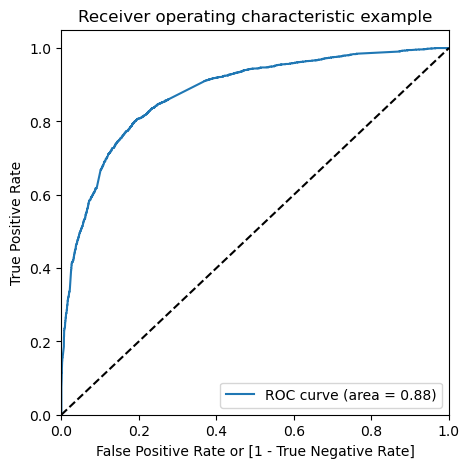

In [118]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"])

## Finding Optimal Cut-off Point

In [119]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.859444,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.084189,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.133997,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.965687,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.220948,9170,0,1,1,1,0,0,0,0,0,0,0


In [120]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.576742  0.968169  0.337212
0.2   0.2  0.728500  0.915668  0.613964
0.3   0.3  0.795041  0.823894  0.777384
0.4   0.4  0.811205  0.761885  0.841386
0.5   0.5  0.813402  0.699049  0.883380
0.6   0.6  0.796453  0.587019  0.924614
0.7   0.7  0.780132  0.502687  0.949911
0.8   0.8  0.760986  0.415874  0.972173
0.9   0.9  0.712649  0.260852  0.989122


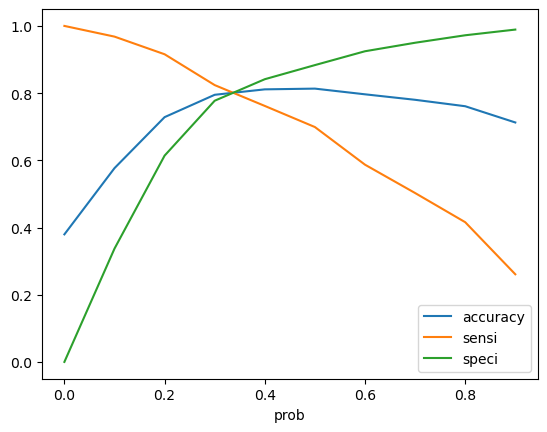

In [121]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above graph 0.32 can be considered as cut-off value 

In [122]:
y_train_pred_final['final_predict'] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict
0,0,0.859444,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.084189,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.133997,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.965687,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.220948,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predict)

0.7978656622724419

In [124]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predict"])
print(confusion2)

[[3114  839]
 [ 449 1970]]


In [125]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
"Sensitivity:", TP2 / float(TP2+FN2)

('Sensitivity:', 0.8143861099627946)

In [127]:
# Let us calculate specificity
"specificity:" ,TN2 / float(TN2+FP2)

('specificity:', 0.7877561345813306)

## Precision and Recall

In [128]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7857806691449815


In [129]:
# Recall
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6990491938817693


In [130]:
# finding the trade off for presion and recall
from sklearn.metrics import precision_recall_curve

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

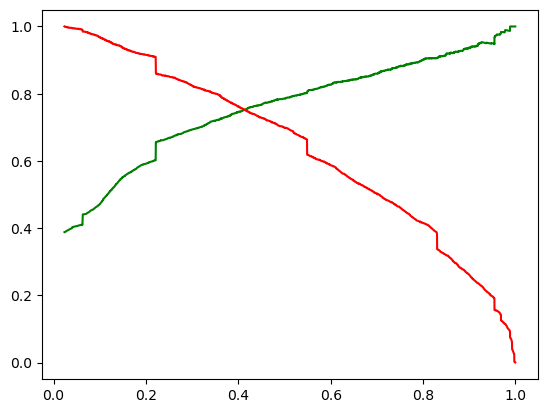

In [132]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Prediction on the Test Dataset

In [133]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3504,3.0,424,3.00,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4050,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7201,2.0,712,2.00,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1196,4.0,423,4.00,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8219,7.0,247,1.75,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [134]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [135]:
# Adding columns which are there in train set
X_test=X_test[col7]

In [136]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,What is your current occupation_Working Professional
3504,0.011952,0.188194,0,0,1,0,0,0,0,0,0,0,0,0,0
4050,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,0
7201,0.007968,0.316023,1,0,0,0,0,0,0,0,0,0,1,0,0
1196,0.015936,0.187750,0,0,1,0,0,0,0,0,0,0,0,0,0
8219,0.027888,0.109632,1,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

In [138]:
# Predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred.head()

3504    0.174358
4050    0.954437
7201    0.570730
1196    0.177103
8219    0.118385
dtype: float64

In [139]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3504,0.174358
4050,0.954437
7201,0.570730
1196,0.177103
8219,0.118385


In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [141]:
# Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [144]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.174358
1,1,4050,0.954437
2,0,7201,0.570730
3,0,1196,0.177103
4,1,8219,0.118385


In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.174358
1,1,4050,0.954437
2,0,7201,0.570730
3,0,1196,0.177103
4,1,8219,0.118385


In [146]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3504,0,0.174358
1,4050,1,0.954437
2,7201,0,0.570730
3,1196,0,0.177103
4,8219,1,0.118385


In [147]:
# Applying the cut off 
y_pred_final['final_predicted'] = y_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3504,0,0.174358,0
1,4050,1,0.954437,1
2,7201,0,0.570730,1
3,1196,0,0.177103,0
4,8219,1,0.118385,0


In [148]:
# Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"]))

Accuracy : 0.798242402050531


In [149]:
# Making the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["final_predicted"])
confusion3

array([[1319,  370],
       [ 181,  861]], dtype=int64)

In [150]:
TP3 = confusion3[1,1] 
TN3 = confusion3[0,0] 
FP3 = confusion3[0,1] 
FN3 = confusion3[1,0]

In [151]:
# sensitivity
print("Sensitivity:",TP / float(TP+FN))

Sensitivity: 0.6990491938817693


In [152]:
# specificity
print("Specificity:",TN / float(TN+FP))

Specificity: 0.8833797116114344


### Precision and Recall values

In [153]:
# Precision
TP3 / TP3 + FP3
print("Precision Test: ",confusion3[1,1]/(confusion3[0,1]+confusion3[1,1]))

Precision Test:  0.6994313566206336


In [154]:
# Recall
TP3 / TP3 + FN3
print("Recall :",confusion3[1,1]/(confusion3[1,0]+confusion3[1,1]))

Recall : 0.8262955854126679


In [155]:
# Lead score to the testing data
y_pred_final['Lead_Score'] = y_pred_final["Converted_prob"].map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.174358,0,17
1,4050,1,0.954437,1,95
2,7201,0,0.570730,1,57
3,1196,0,0.177103,0,18
4,8219,1,0.118385,0,12


In [156]:
thresholds = [90, 80, 70, 60]

for threshold in thresholds:
    filtered_rows = y_pred_final[y_pred_final['Lead_Score'] > threshold]
    row_count = len(filtered_rows)
    print(f"Number of rows with Lead_score > {threshold}: {row_count}")

Number of rows with Lead_score > 90: 283
Number of rows with Lead_score > 80: 477
Number of rows with Lead_score > 70: 602
Number of rows with Lead_score > 60: 698


## Conclusion

#### Model Evaluation Numbers

##### Train Data

* Accuracy - 79.78
* Specificity - 81.43
* Sensitivity - 78.77

##### Test Data 

* Accuracy - 79.82
* Specificity - 82.62
* Sensitivity - 78.09

#### Variables that mattered the most are the variables which has the highest coefficient values
##### Positive Coefficient
- Total Visits 
- Total Time Spent on website
- Working professional
- Lead Source - Welingak website

##### Negative Coefficient
- Lead Search which includes Google, Organic Search and Referral Sites
- Last Activity which includes Converted to Leads, Olark chat conversation and Email Bounced.

#### Below are the hot Lead counts for different Lead Scores
- Number of rows with Lead_score > 90: 283
- Number of rows with Lead_score > 80: 477
- Number of rows with Lead_score > 70: 602
- Number of rows with Lead_score > 60: 698